
# A Classification problem solution attempt with Decision Tree Classifiers, Random Forest Classifiers, Artificial Neural Networks, Gradient Boosting Classifier, K-Neighbors Classifier & Logistic Regression
🕸🕸🕸🕸🕸🕸🕸🕸🕸🕸🕸🕸🌲🌳🌲🌲🌳🌲🌲🌳🌲🌲🌳🌲🌲🌳🌲🌲🌲🌳🌲🌲🌳🌲🌲🌳🌲🌲🌳🌲🌲🌳🌲🌲🌳🕸🕸🕸🕸🕸🕸🕸🕸🕸🕸🕸🕸

---




Sources:
(a) Original owner of the database:

   R. K. Bock
   Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
   http://wwwmagic.mppmu.mpg.de
   rkb@mail.cern.ch
  
(b) Donor:

   P. Savicky
   Institute of Computer Science, AS of CR
   Czech Republic
   savicky@cs.cas.cz

# Importing libraries

In [1]:
#This cell was used to install mpld3. It allows to manipulate plots: zoom and moving
#!pip install mpld3

In [2]:
#%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

In [3]:
#plots and style
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import matplotlib.style as sty
#sty.use('ggplot')
sty.use('seaborn-whitegrid')
from matplotlib.pyplot import figure

In [4]:
#To avoid the warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
import numpy as np
import pandas as pd
import sys, os

#to not print
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

#to print tables in LaTex
#!pip install tabulate
from tabulate import tabulate

In [6]:
#ROC curve and AUC
from sklearn.metrics import roc_curve, auc

In [7]:
#importing all possible distributions
from scipy.stats import genextreme
from scipy.stats import gamma
from scipy.stats import t
from scipy.stats import dweibull
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import pareto
from scipy.stats import genextreme
from scipy.stats import uniform
from scipy.stats import logistic
from scipy.stats import kstest
from scipy.stats import ks_2samp
from scipy.stats import lognorm
#this distribution is for annother purpose
from scipy.stats import loguniform

In [8]:
# Importing train_test_split to split our data
from sklearn.model_selection import train_test_split

In [9]:
# From the distfit library import the class distfit
from distfit import distfit

In [10]:
# Importing Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
# Importing Random Forest Model
from sklearn.ensemble import RandomForestClassifier
# Importing GBC
from sklearn.ensemble import GradientBoostingClassifier
#Importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression

# Importing mean_absolute_error to find Mean absolute error of each model
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [11]:
#To normalize data
from sklearn.preprocessing import StandardScaler

In [12]:
#import keras ANN
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [13]:
#cross vaidation
from sklearn.model_selection import cross_val_score
#Hyperparameter tunning
from sklearn.model_selection import GridSearchCV,cross_validate, RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [14]:
#optimizer for the cuts
from scipy.optimize import minimize

In [15]:
font = {
        'size'   : 19}
#to set a biggers size of text in plots
from matplotlib import rc
rc('font', **font)

# Displaying Data

In [16]:
df = pd.read_csv('telescope_data.csv')#importing data
del df['Unnamed: 0']#this column was empty
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Summary the raw data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


There are not missing values so we don't need to use pipelines to structure the data

In [18]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [19]:
df.shape

(19020, 11)

The data has 11 variables with 19020 events:
1.  fLength:  continuous  -  major axis of ellipse [mm]
2.  fWidth:   continuous  - minor axis of ellipse [mm] 
3.  fSize:    continuous  - 10-log of sum of content of all pixels [in #phot]
4.  fConc:    continuous  - ratio of sum of two highest pixels over fSize  [ratio]
5.  fConc1:   continuous  - ratio of highest pixel over fSize  [ratio]
6.  fAsym:    continuous  - distance from highest pixel to center, projected onto major axis [mm]
7.  fM3Long:  continuous  - 3rd root of third moment along major axis  [mm] 
8.  fM3Trans: continuous  - 3rd root of third moment along minor axis  [mm]
9.  fAlpha:   continuous  - angle of major axis with vector to origin [deg]
10.  fDist:    continuous  - distance from origin to center of ellipse [mm]
11.  class:    g,h  - gamma (signal), hadron (background)

## Check distribution and correlations

<AxesSubplot:>

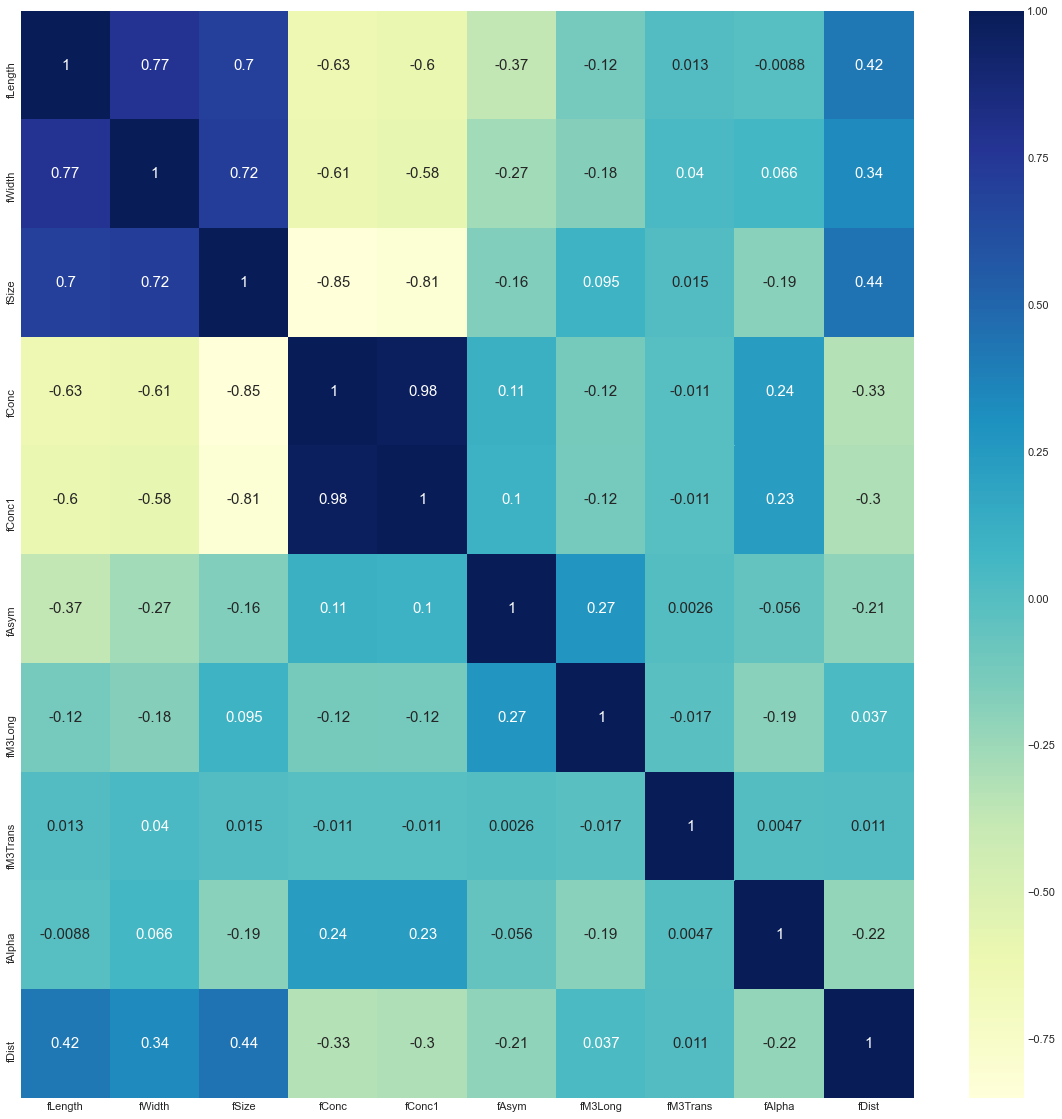

In [20]:
plt.figure(figsize=(20, 20))
#Compute pairwise correlation of columns, excluding NA/null values. It displays pearson standard correlation coefficient
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", annot_kws={"size":15})

It is notorious that there is a high correlation between *fConc* and *fConc1*, but that is rather obvious from their definitions:
4.  fConc:    continuous  - ratio of sum of the two highest pixels over fSize  [ratio]
5.  fConc1:   continuous  - ratio of the highest pixel over fSize  [ratio]

Before looking for the distributions it is needed to separate the data in training and test categories:

In [21]:
# Create target object and call it y
y = df['class'].replace('g',1).replace('h',0)

# Create X
features = list(df)[:-1]#without the last column
X = df[features]

In [22]:
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.25, random_state = 0)

Pearson  pairwise correlation  of the train data categories with the binary target category : Signal

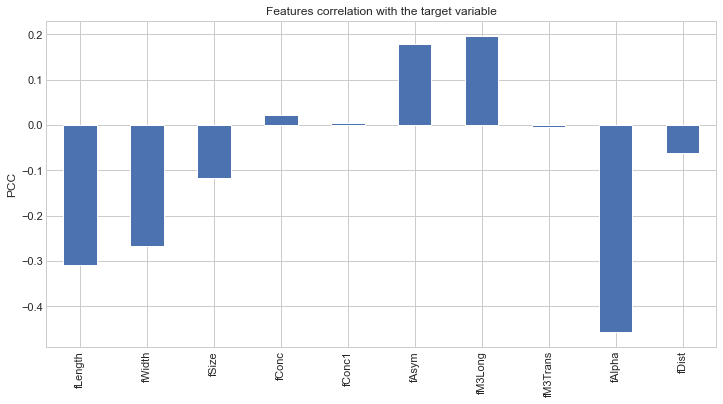

In [23]:
train_X.corrwith(train_y).plot(kind='bar', figsize=(12, 6), title='Features correlation with the target variable')
plt.ylabel("PCC")
plt.show()

The most strong correlation is a negative correlation between *fAlpha ("continuous  - angle of major axis with vector to origin [deg]")* and the target binary variable *class*.

## Testing distributions on the parameters of the train data

A kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. These are KDE plots on top of the distribution histograms:

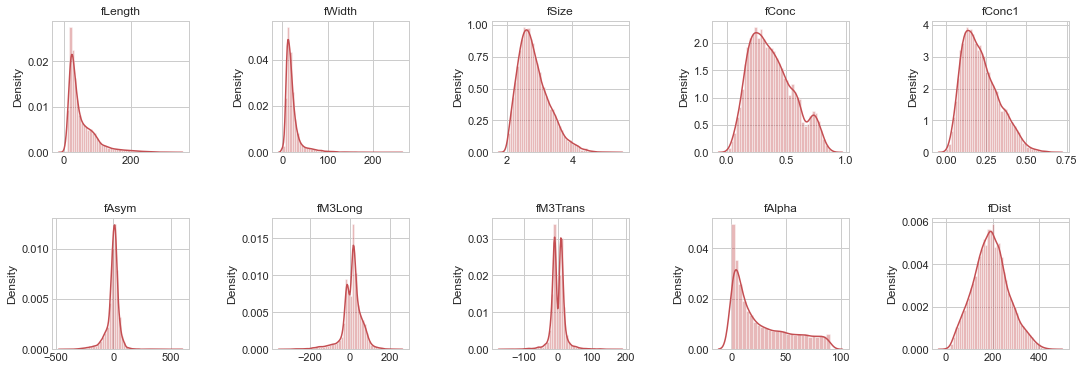

In [24]:
fig, ax = plt.subplots(2,5, figsize=(16, 6))
ax = ax.flatten()
for i in range(10):
    sns.distplot(train_X.iloc[:,i].values,ax=ax[i],color='r')#it plots both the histogram and the KDE
    ax[i].set_title(train_X.columns[i])#title of the histogram
fig.tight_layout(pad=2.0)   

Disfit is a package that proves some possible distributions (89) and looks for the best theoretical distribution using the Residual Sum of Squares (RSS) estimates. It starts with interpolation to smooth a histogram of the distribution. Then it uses the RSS to look for the best distributions. 
This is a good way to obtain the best distribution and the RSS of the most popular models.

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 0.0008238] [loc=53.457 scale=43.056] 
[distfit] >[expon     ] [RSS: 0.0007048] [loc=4.284 scale=49.174] 
[distfit] >[pareto    ] [RSS: 0.0029099] [loc=-0.008 scale=4.291] 
[distfit] >[dweibull  ] [RSS: 0.0004258] [loc=32.517 scale=26.580] 
[distfit] >[t         ] [RSS: 0.0004800] [loc=37.070 scale=20.196] 
[distfit] >[genextreme] [RSS: 0.0000708] [loc=30.620 scale=17.712] 
[distfit] >[gamma     ] [RSS: 0.0003334] [loc=4.277 scale=27.514] 
[distfit] >[lognorm   ] [RSS: 0.0024580] [loc=4.283 scale=3.028] 
[distfit] >[beta      ] [RSS: 0.0003345] [loc=4.277 scale=6629220575.237] 
[distfit] >[uniform   ] [RSS: 0.0015846] [loc=4.284 scale=329.894] 
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


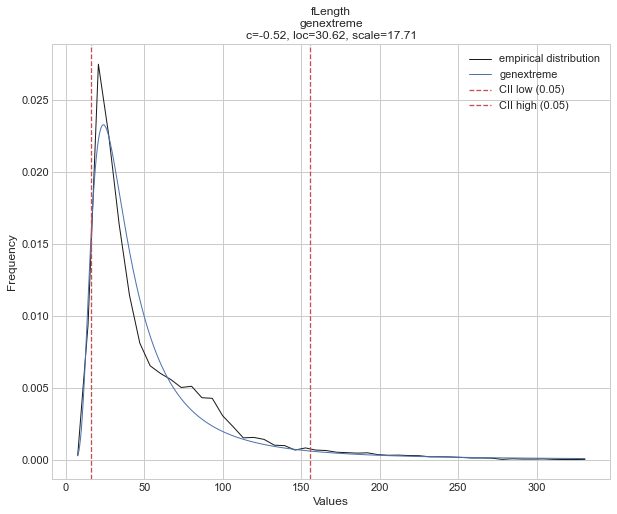

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 0.0022657] [loc=22.241 scale=18.645] 
[distfit] >[expon     ] [RSS: 0.0029952] [loc=0.000 scale=22.241] 
[distfit] >[pareto    ] [RSS: 0.0073812] [loc=-3.115 scale=3.115] 
[distfit] >[dweibull  ] [RSS: 0.0005543] [loc=16.308 scale=9.375] 
[distfit] >[t         ] [RSS: 0.0002920] [loc=16.485 scale=6.342] 
[distfit] >[genextreme] [RSS: 0.0001671] [loc=14.619 scale=8.279] 
[distfit] >[gamma     ] [RSS: 0.0007863] [loc=-0.634 scale=9.070] 
[distfit] >[lognorm   ] [RSS: 0.0003792] [loc=-2.667 scale=20.991] 
[distfit] >[beta      ] [RSS: 0.0008131] [loc=-0.596 scale=166546178985.119] 
[distfit] >[uniform   ] [RSS: 0.0056181] [loc=0.000 scale=256.382] 
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


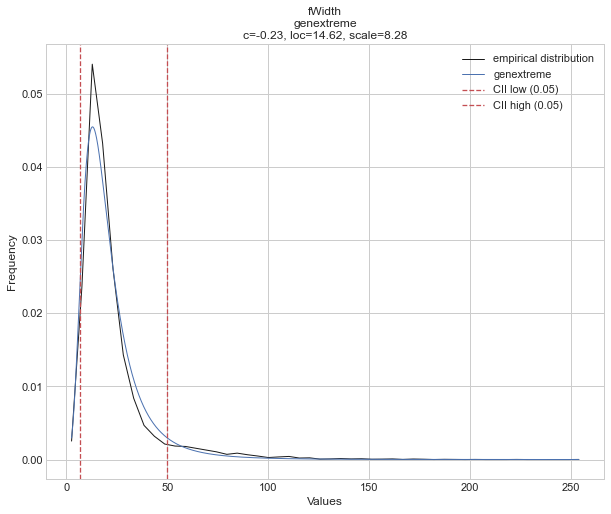

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 0.6279483] [loc=2.824 scale=0.472] 
[distfit] >[expon     ] [RSS: 4.0566499] [loc=1.947 scale=0.877] 
[distfit] >[pareto    ] [RSS: 5.7587757] [loc=-0.042 scale=1.989] 
[distfit] >[dweibull  ] [RSS: 0.8185592] [loc=2.792 scale=0.396] 
[distfit] >[t         ] [RSS: 0.5201262] [loc=2.794 scale=0.426] 
[distfit] >[genextreme] [RSS: 0.0495485] [loc=2.606 scale=0.370] 
[distfit] >[gamma     ] [RSS: 0.0282840] [loc=1.921 scale=0.255] 
[distfit] >[lognorm   ] [RSS: 0.0360586] [loc=1.593 scale=1.146] 
[distfit] >[beta      ] [RSS: 0.0318266] [loc=1.942 scale=7.808] 
[distfit] >[uniform   ] [RSS: 5.3198046] [loc=1.947 scale=3.376] 
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


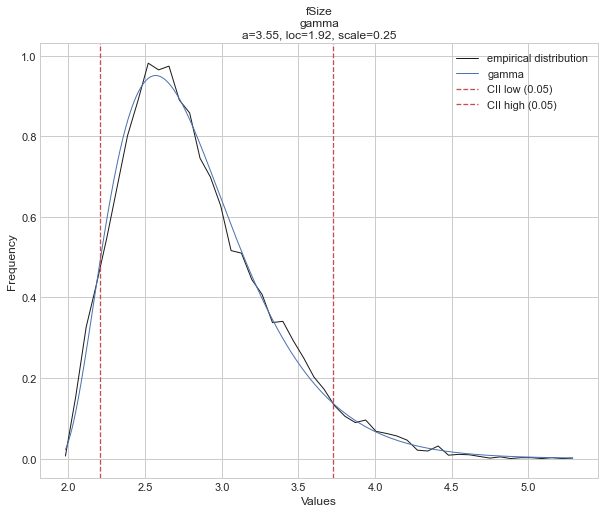

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 6.1926246] [loc=0.381 scale=0.183] 
[distfit] >[expon     ] [RSS: 39.1630033] [loc=0.013 scale=0.368] 
[distfit] >[pareto    ] [RSS: 36.2632547] [loc=-29317.168 scale=29317.181] 
[distfit] >[dweibull  ] [RSS: 8.0966123] [loc=0.374 scale=0.164] 
[distfit] >[t         ] [RSS: 6.1937253] [loc=0.381 scale=0.183] 
[distfit] >[genextreme] [RSS: 2.4931807] [loc=0.301 scale=0.157] 
[distfit] >[gamma     ] [RSS: 1.6033370] [loc=-0.042 scale=0.084] 
[distfit] >[lognorm   ] [RSS: 2.0545347] [loc=-0.238 scale=0.593] 
[distfit] >[beta      ] [RSS: 1.8778444] [loc=0.011 scale=1.046] 
[distfit] >[uniform   ] [RSS: 25.3005185] [loc=0.013 scale=0.880] 
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


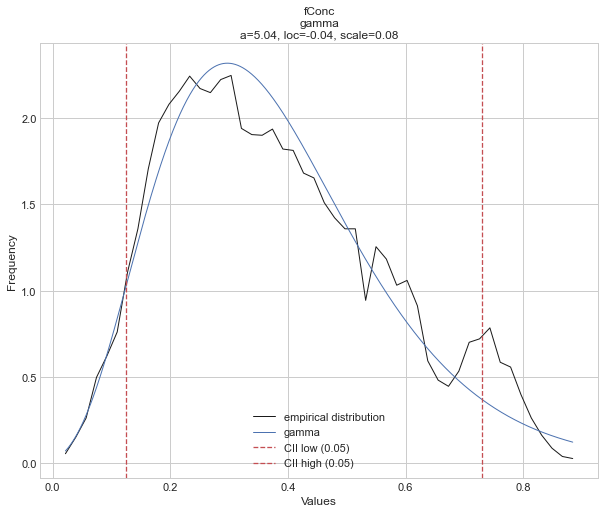

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 14.5504566] [loc=0.215 scale=0.111] 
[distfit] >[expon     ] [RSS: 86.4852924] [loc=0.000 scale=0.215] 
[distfit] >[pareto    ] [RSS: 86.9637038] [loc=-1397449.525 scale=1397449.526] 
[distfit] >[dweibull  ] [RSS: 20.4854740] [loc=0.209 scale=0.097] 
[distfit] >[t         ] [RSS: 14.5022300] [loc=0.215 scale=0.111] 
[distfit] >[genextreme] [RSS: 3.3369324] [loc=0.164 scale=0.090] 
[distfit] >[gamma     ] [RSS: 1.6243850] [loc=-0.014 scale=0.056] 
[distfit] >[lognorm   ] [RSS: 2.4153420] [loc=-0.095 scale=0.291] 
[distfit] >[beta      ] [RSS: 1.7704505] [loc=-0.002 scale=1.091] 
[distfit] >[uniform   ] [RSS: 90.3234778] [loc=0.000 scale=0.675] 
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


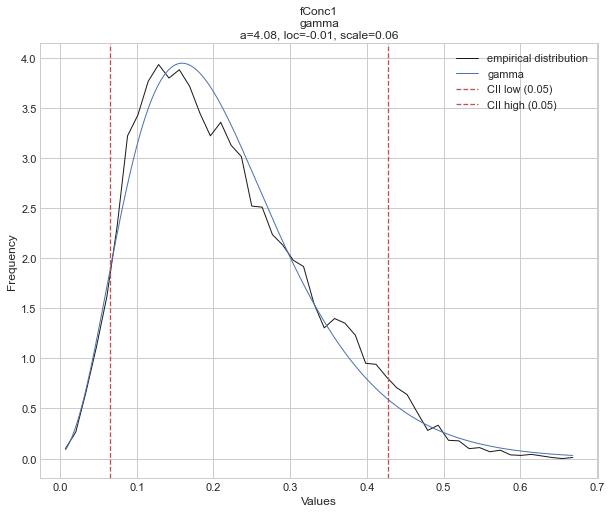

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 0.0000739] [loc=-4.561 scale=59.668] 
[distfit] >[expon     ] [RSS: 0.0003350] [loc=-449.953 scale=445.392] 
[distfit] >[pareto    ] [RSS: 0.0003222] [loc=-3560720.763 scale=3560270.793] 
[distfit] >[dweibull  ] [RSS: 0.0000072] [loc=4.067 scale=35.483] 
[distfit] >[t         ] [RSS: 0.0000026] [loc=5.061 scale=27.058] 
[distfit] >[genextreme] [RSS: 0.0003736] [loc=574.857 scale=3.477] 
[distfit] >[gamma     ] [RSS: 0.0000882] [loc=-744.222 scale=5.404] 
[distfit] >[lognorm   ] [RSS: 0.0004332] [loc=-449.953 scale=8.025] 
[distfit] >[beta      ] [RSS: 0.0000721] [loc=-13641.414 scale=15514.513] 
[distfit] >[uniform   ] [RSS: 0.0003146] [loc=-449.953 scale=1025.193] 
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


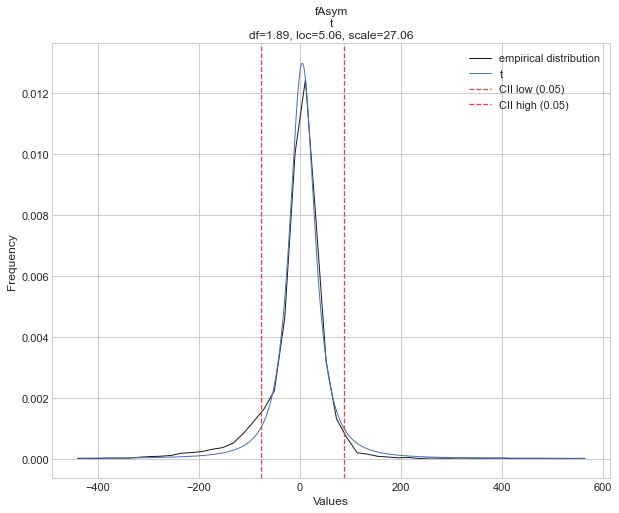

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 0.0001345] [loc=10.301 scale=51.722] 
[distfit] >[expon     ] [RSS: 0.0006436] [loc=-331.780 scale=342.081] 
[distfit] >[pareto    ] [RSS: 0.0006260] [loc=-46449814487.046 scale=46449814155.266] 
[distfit] >[dweibull  ] [RSS: 0.0000509] [loc=16.190 scale=32.972] 
[distfit] >[t         ] [RSS: 0.0000609] [loc=14.167 scale=29.975] 
[distfit] >[genextreme] [RSS: 0.0007580] [loc=237.907 scale=3.192] 
[distfit] >[gamma     ] [RSS: 0.0001791] [loc=-335.645 scale=10.096] 
[distfit] >[lognorm   ] [RSS: 0.0001336] [loc=-16211.650 scale=16222.055] 
[distfit] >[beta      ] [RSS: 0.0001290] [loc=-656596.974 scale=656882.520] 
[distfit] >[uniform   ] [RSS: 0.0005571] [loc=-331.780 scale=570.101] 
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


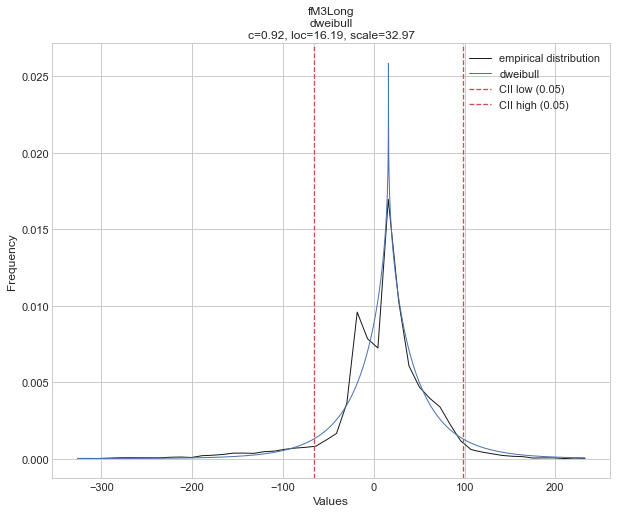

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 0.0006329] [loc=0.231 scale=20.982] 
[distfit] >[expon     ] [RSS: 0.0027997] [loc=-164.140 scale=164.371] 
[distfit] >[pareto    ] [RSS: 0.0027414] [loc=-5847212965.351 scale=5847212801.211] 
[distfit] >[dweibull  ] [RSS: 0.0004889] [loc=0.183 scale=16.000] 
[distfit] >[t         ] [RSS: 0.0005865] [loc=0.093 scale=13.670] 
[distfit] >[genextreme] [RSS: 0.0009438] [loc=-8.486 scale=25.394] 
[distfit] >[gamma     ] [RSS: 0.0006380] [loc=-502.329 scale=0.887] 
[distfit] >[lognorm   ] [RSS: 0.0036828] [loc=-164.140 scale=1.965] 
[distfit] >[beta      ] [RSS: 0.0006325] [loc=-1622.590 scale=8338.412] 
[distfit] >[uniform   ] [RSS: 0.0025978] [loc=-164.140 scale=343.991] 
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


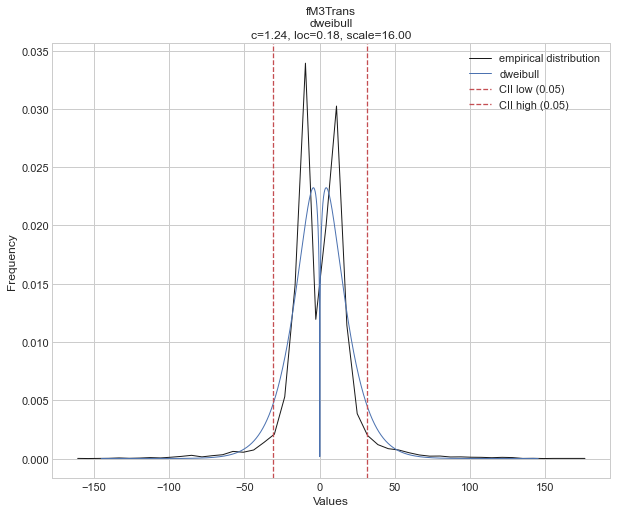

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 0.0054292] [loc=27.709 scale=26.155] 
[distfit] >[expon     ] [RSS: 0.0010020] [loc=0.000 scale=27.709] 
[distfit] >[pareto    ] [RSS: 0.0011171] [loc=-350630.409 scale=350630.409] 
[distfit] >[dweibull  ] [RSS: 0.0051886] [loc=32.269 scale=26.029] 
[distfit] >[t         ] [RSS: 0.0054292] [loc=27.708 scale=26.154] 
[distfit] >[genextreme] [RSS: 0.0015523] [loc=10.200 scale=12.000] 
[distfit] >[gamma     ] [RSS: 0.0006142] [loc=-0.000 scale=28.173] 
[distfit] >[lognorm   ] [RSS: 0.0126030] [loc=-0.000 scale=1.682] 
[distfit] >[beta      ] [RSS: 0.0006344] [loc=-0.000 scale=91.020] 
[distfit] >[uniform   ] [RSS: 0.0053099] [loc=0.000 scale=90.000] 
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


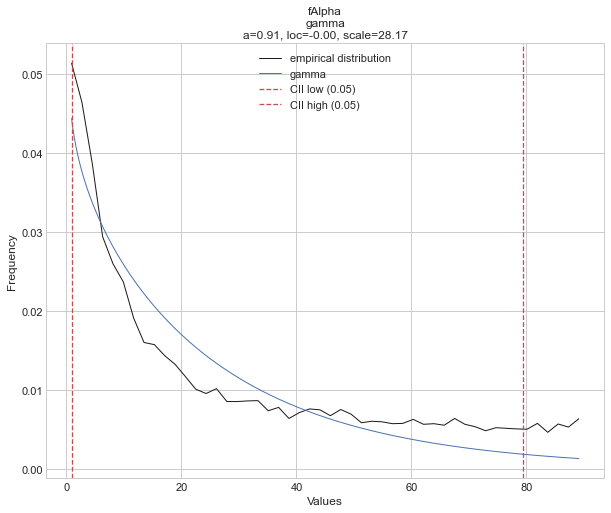

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [RSS: 0.0000030] [loc=193.614 scale=74.718] 
[distfit] >[expon     ] [RSS: 0.0002424] [loc=1.283 scale=192.332] 
[distfit] >[pareto    ] [RSS: 0.0010388] [loc=0.001 scale=1.282] 
[distfit] >[dweibull  ] [RSS: 0.0000079] [loc=190.675 scale=63.433] 
[distfit] >[t         ] [RSS: 0.0000030] [loc=193.624 scale=74.714] 
[distfit] >[genextreme] [RSS: 0.0000032] [loc=164.788 scale=71.444] 
[distfit] >[gamma     ] [RSS: 0.0000026] [loc=-350.235 scale=10.288] 
[distfit] >[lognorm   ] [RSS: 0.0000026] [loc=-651.058 scale=841.382] 
[distfit] >[beta      ] [RSS: 0.0000038] [loc=-44.890 scale=630.875] 
[distfit] >[uniform   ] [RSS: 0.0001765] [loc=1.283 scale=465.125] 
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


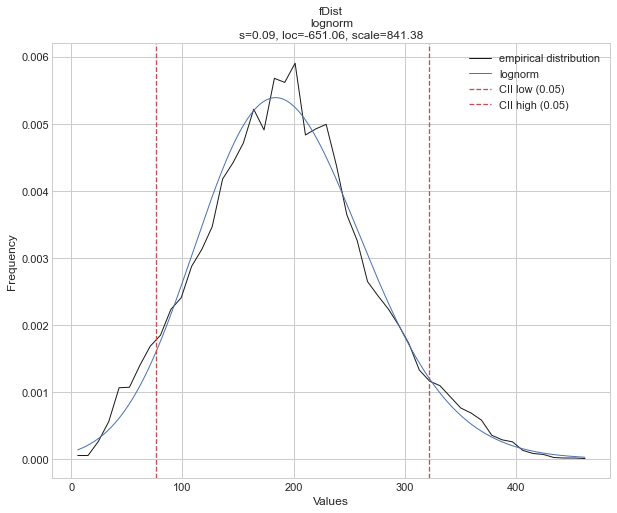

In [25]:
aempty=[]
for i in range(10):
    # Initialize
    dist = distfit()
    # Search for best theoretical fit on your emperical data
    aempty.append(dist.fit_transform(train_X.iloc[:,i].values))#save the RSS results
    # plot
    dist.plot(train_X.columns[i])

Now, it is known which is the best distribution for each parameter. The Residual Sum of Squares (RSS)  was used to compare.

To have a better idea, the same test of which-distribution-is-the-best-fit is made using Maximum Likelihood Estimation (MLE).
Calculating the *negative loglikelihood function* for all the parameter data with the principal distributions that Disfit try before:

In [26]:
dist =[norm, expon, pareto, dweibull, t, genextreme, gamma, lognorm, beta, uniform,logistic,lognorm]#distribution names
mles = []#to save the MLE of each parameter for each distribution
besto=[]
for i in range(10):#for each parameter
  mle_i=[train_X.columns[i],]
  mini=[float('inf'),'none']
  for distribution in dist:#for each distribution
        #obtaining parameters of the distribution from data using MLE estimation 
      pars = distribution.fit(train_X.iloc[:,i].values)
        # negative loglikelihood function for the data and the distribution w the parameter's values obtained in the previous line
      mle = distribution.nnlf(pars,train_X.iloc[:,i].values)
      mle_i.append(mle)#saving
      if mle<mini[0]:#looking for the minimum  negative loglikelihood function for each parameter data
        mini=[mle,distribution.name,pars]
  mles.append(mle_i)#saving the MLE for all distributions
  besto.append([train_X.columns[i]]+mini)#save the best

distnames= [distribution.name for distribution in dist]
print(tabulate(mles, headers=["parameter"]+distnames,numalign="right",floatfmt="1.3e",tablefmt="github"))

| parameter   |       norm |      expon |     pareto |   dweibull |          t |   genextreme |      gamma |    lognorm |       beta |    uniform |   logistic |    lognorm |
|-------------|------------|------------|------------|------------|------------|--------------|------------|------------|------------|------------|------------|------------|
| fLength     |  7.391e+04 |  6.983e+04 |  7.919e+04 |  7.188e+04 |  7.161e+04 |    6.766e+04 |  6.862e+04 |  8.594e+04 |  6.862e+04 |  8.272e+04 |  7.256e+04 |  8.594e+04 |
| fWidth      |  6.197e+04 |  5.851e+04 |  6.743e+04 |  5.702e+04 |  5.607e+04 |    5.460e+04 |  5.621e+04 |  5.516e+04 |  5.622e+04 |  7.912e+04 |  5.876e+04 |  5.516e+04 |
| fSize       |  9.544e+03 |  1.239e+04 |  1.422e+04 |  9.494e+03 |  9.441e+03 |    8.429e+03 |  8.318e+03 |  8.387e+03 |  8.302e+03 |  1.736e+04 |  9.463e+03 |  8.387e+03 |
| fConc       | -3.946e+03 |  2.152e+00 |  2.775e+01 | -3.766e+03 | -3.946e+03 |   -4.479e+03 | -4.565e+03 | -4.484e+03 | -4.748e+

The distribution with the lowest negative loglikelihood function is the best option for fitting.

| parameter   |       norm |      expon |     pareto |   dweibull |          t |   genextreme |      gamma |    lognorm |       beta |    uniform |   logistic |    lognorm |
|-------------|------------|------------|------------|------------|------------|--------------|------------|------------|------------|------------|------------|------------|
| fLength     |  7.391e+04 |  6.983e+04 |  7.919e+04 |  7.188e+04 |  7.161e+04 |    6.766e+04 |  6.862e+04 |  8.594e+04 |  6.862e+04 |  8.272e+04 |  7.256e+04 |  8.594e+04 |
| fWidth      |  6.197e+04 |  5.851e+04 |  6.743e+04 |  5.702e+04 |  5.607e+04 |    5.460e+04 |  5.621e+04 |  5.516e+04 |  5.622e+04 |  7.912e+04 |  5.876e+04 |  5.516e+04 |
| fSize       |  9.544e+03 |  1.239e+04 |  1.422e+04 |  9.494e+03 |  9.441e+03 |    8.429e+03 |  8.318e+03 |  8.387e+03 |  8.302e+03 |  1.736e+04 |  9.463e+03 |  8.387e+03 |
| fConc       | -3.946e+03 |  2.152e+00 |  2.775e+01 | -3.766e+03 | -3.946e+03 |   -4.479e+03 | -4.565e+03 | -4.484e+03 | -4.748e+03 | -1.825e+03 | -3.634e+03 | -4.484e+03 |
| fConc1      | -1.110e+04 | -7.670e+03 | -7.669e+03 | -1.100e+04 | -1.110e+04 |   -1.195e+04 | -1.206e+04 | -1.199e+04 | -1.211e+04 | -5.609e+03 | -1.095e+04 | -1.199e+04 |
| fAsym       |  7.857e+04 |  1.013e+05 |  1.021e+05 |  7.570e+04 |  7.547e+04 |    1.426e+05 |  7.918e+04 |  1.271e+05 |  7.847e+04 |  9.889e+04 |  7.672e+04 |  1.271e+05 |
| fM3Long     |  7.653e+04 |  9.750e+04 |  9.767e+04 |  7.458e+04 |  7.470e+04 |    1.268e+05 |  7.834e+04 |  7.656e+04 |  7.606e+04 |  9.052e+04 |  7.527e+04 |  7.656e+04 |
| fM3Trans    |  6.366e+04 |  8.705e+04 |  8.721e+04 |  6.195e+04 |  6.164e+04 |    6.560e+04 |  6.368e+04 |  1.141e+05 |  6.365e+04 |  8.332e+04 |  6.208e+04 |  1.141e+05 |
| fAlpha      |  6.680e+04 |  6.165e+04 |  6.169e+04 |  6.624e+04 |  6.680e+04 |    6.346e+04 |  6.156e+04 |  7.113e+04 |  6.050e+04 |  6.419e+04 |  6.708e+04 |  7.113e+04 |
| fDist       |  8.178e+04 |  8.929e+04 |  1.108e+05 |  8.196e+04 |  8.178e+04 |    8.169e+04 |  8.170e+04 |  8.170e+04 |  8.167e+04 |  8.762e+04 |  8.193e+04 |  8.170e+04 |

The best distribution for each parameter are (using MLE):

In [27]:
print(tabulate(besto, headers=["Parameter","Min MLE","Best Distribution","pars"],floatfmt="1.3e",tablefmt="github"))

| Parameter   |    Min MLE | Best Distribution   | pars                                                                                |
|-------------|------------|---------------------|-------------------------------------------------------------------------------------|
| fLength     |  6.766e+04 | genextreme          | (-0.5168311011076752, 30.620170091516144, 17.712035391223132)                       |
| fWidth      |  5.460e+04 | genextreme          | (-0.2302990459331291, 14.619278332812193, 8.279171747642685)                        |
| fSize       |  8.302e+03 | beta                | (2.9865075466901647, 23.466690106826164, 1.9421685492730938, 7.807898188679667)     |
| fConc       | -4.748e+03 | beta                | (2.3747563441321544, 4.319102239567787, 0.011010372014689334, 1.0462523165345419)   |
| fConc1      | -1.211e+04 | beta                | (2.9205386446315, 11.717734743239793, -0.0023693459483200225, 1.090849660322091)    |
| fAsym       |  7.547e+04 | t           

| Parameter   |    Min MLE | Best Distribution   | pars                                                                                |
|-------------|------------|---------------------|-------------------------------------------------------------------------------------|
| fLength     |  6.766e+04 | genextreme          | (-0.5168311011076752, 30.620170091516144, 17.712035391223132)                       |
| fWidth      |  5.460e+04 | genextreme          | (-0.2302990459331291, 14.619278332812193, 8.279171747642685)                        |
| fSize       |  8.302e+03 | beta                | (2.9865075466901647, 23.466690106826164, 1.9421685492730938, 7.807898188679667)     |
| fConc       | -4.748e+03 | beta                | (2.3747563441321544, 4.319102239567787, 0.011010372014689334, 1.0462523165345419)   |
| fConc1      | -1.211e+04 | beta                | (2.9205386446315, 11.717734743239793, -0.0023693459483200225, 1.090849660322091)    |
| fAsym       |  7.547e+04 | t                   | (1.8911380046029715, 5.06126445621727, 27.05805512093712)                           |
| fM3Long     |  7.458e+04 | dweibull            | (0.919733391237972, 16.190099999999994, 32.9720695688185)                           |
| fM3Trans    |  6.164e+04 | t                   | (3.6797649833440547, 0.09323594876200089, 13.67041677212795)                        |
| fAlpha      |  6.050e+04 | beta                | (0.6183227106691553, 1.3324627013144175, -4.213909411700232e-28, 91.01981546505654) |
| fDist       |  8.167e+04 | beta                | (5.938498285136098, 9.77054573870754, -44.89030744651807, 630.8748075748614)        |

I produce other types of plots with the results above by including  results with the MLE and the first results with the *disfit* package.  Also, the KS test was made, but the results were not satisfctory.

In [28]:
def plotdist(namee,xval,par,typel,data) :
    #function to plot all distributions
    a=par[0]#a and b are shape parameters of the distribution
    b=par[1]
    c=par[2]#c can be a shape parameter but most of the time is the scale parameter
    if ( namee== "genextreme" ):
        y1 = genextreme.pdf(xval, a,b,c) #the density plot which is essentially a smooth version of the histogram
        label= typel+": Genextreme pdf"
        ksdata=list(kstest(rvs=data, cdf='genextreme',args=par))#KS test result and p value
        
    elif (namee == "gamma" ):
        xval = np.linspace( max(0.25,min(xval)),max(xval), 200)# I have to add this because when x-> 0, the distribution->inf too fast
        y1= gamma.pdf(xval,a,b,c)#the density plot which is essentially a smooth version of the histogram
        label= typel+": Gamma pdf"
        ksdata=list(kstest(rvs=data, cdf='gamma',args=par))#KS test result and p value
         
    elif ( namee == "t" ):
        y1= t.pdf(xval,a,b,c)#the density plot which is essentially a smooth version of the histogram
        label= typel+": t pdf"
        ksdata=list(kstest(rvs =data, cdf= 't',args=par))#KS test result and p value
         
    elif ( namee == "dweibull" ):
        y1= dweibull.pdf(xval,a,b,c)#the density plot which is essentially a smooth version of the histogram
        label= typel+": Dweibull pdf"
        ksdata=list(kstest(rvs =data, cdf='dweibull',args=par))#KS test result and p value
        
    elif (namee == "beta" ):
        xval = np.linspace( max(0.25,min(xval)),max(xval), 200)#the same reason of the gamma case
        d= par[3]# scale factor
        y1= beta.pdf(xval,a,b,c,d)#the density plot which is essentially a smooth version of the histogram
        label= typel+": Beta pdf"    
        ksdata=list(kstest(rvs =data, cdf='beta',args=par))#KS test result and p value
        
    elif (namee == "lognorm" ):
        y1= lognorm.pdf(xval,a,b,c)#the density plot which is essentially a smooth version of the histogram
        label= typel+": Lognorm pdf"
        ksdata=list(kstest(rvs =data, cdf='lognorm',args=par))#KS test result and p value
        
    return (y1,label,ksdata)#returns the points for the distribution, label, ks value

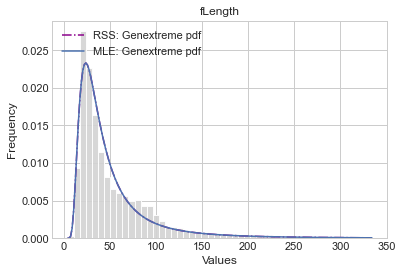

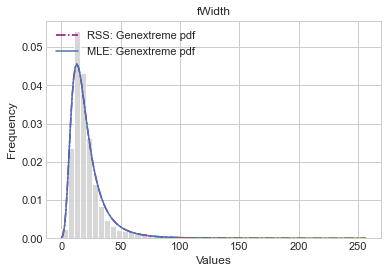

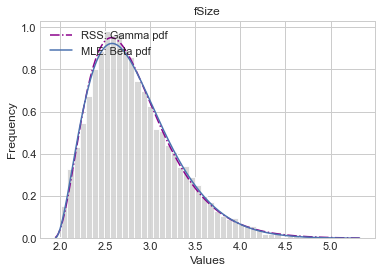

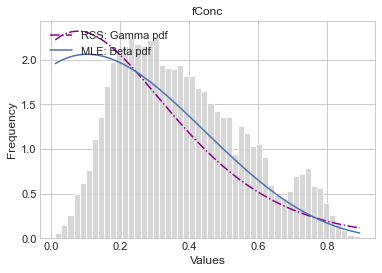

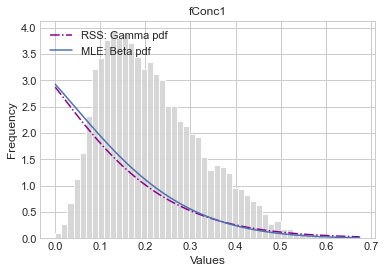

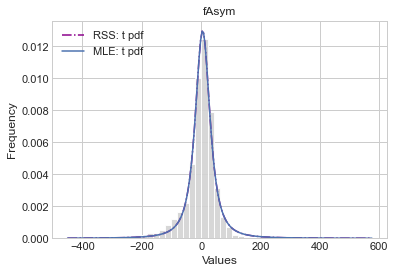

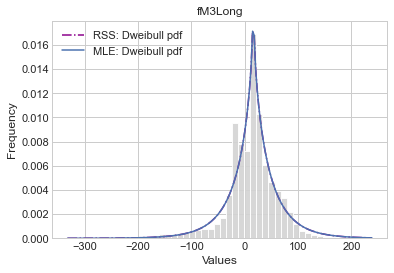

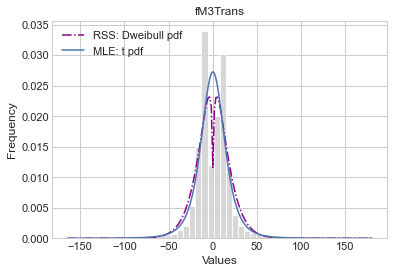

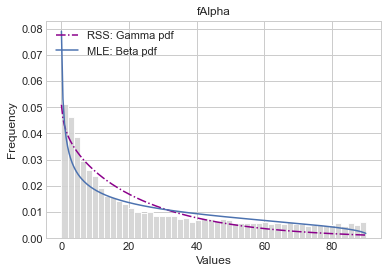

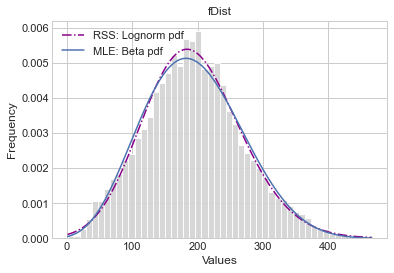

In [29]:
figsize=(30,20)
ksdata1=[]
ksdata2=[]
for i in range(10):
    data=train_X.iloc[:,i].values#each column data
    xval = np.linspace(min(data), max(data), 200)#x points to plot
    
    #Disfit package
    namee=((aempty[i])['model'])['name'] #best distribution given by disfit package
    par=((aempty[i])['model'])['params'] #parameters for the best distribution statated in the previous line by disfit
    (y_1,label1,ks1)=plotdist(namee,xval,par,"RSS",data)
    ksdata1.append([train_X.columns[i]]+[namee]+ks1)#KS and p value of RSS-disfit result
    
    #MLE with scipy
    temp=besto[i]#best distribution chosen by minimun negative loglikelihood function
    namee=temp[2]#name
    par=temp[3]#parameters
    (y_2,label2,ks2)=plotdist(namee,xval,par,"MLE",data)
    ksdata2.append([train_X.columns[i]]+[namee]+ks2)#KS and p value of MLE result

    plt.hist(data, bins=aempty[i]['bins'], density=True,color='lightgrey',alpha = 0.9,)#histogram plot

    plt.plot(xval, y_1,linestyle='-.',label=label1,color='darkmagenta')#smooth distribution of the histogram plot for disfit results
    plt.plot(xval, y_2,label=label2,color='b')#smooth distribution of the histogram plot for MLE results
    plt.legend(loc="upper left")
    plt.title(train_X.columns[i])
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()
    print('\n')

Results of the goodness of the fit ( parameters obtained with Residual Sum of Squares (RSS) - *disfit* package) using the KS-test :

In [30]:
print(tabulate(ksdata1, headers=["parameter","Best distribution fit","KS test statistic","p-value"],numalign="right",tablefmt="github"))#tablefmt="latex"

| parameter   | Best distribution fit   |   KS test statistic |     p-value |
|-------------|-------------------------|---------------------|-------------|
| fLength     | genextreme              |           0.0505276 | 4.32225e-32 |
| fWidth      | genextreme              |           0.0475182 | 1.97834e-28 |
| fSize       | gamma                   |          0.00933521 |    0.165311 |
| fConc       | gamma                   |           0.0262115 | 6.01853e-09 |
| fConc1      | gamma                   |           0.0190699 | 6.15626e-05 |
| fAsym       | t                       |           0.0477719 | 9.91746e-29 |
| fM3Long     | dweibull                |           0.0701475 | 1.76044e-61 |
| fM3Trans    | dweibull                |           0.0590488 | 1.11829e-43 |
| fAlpha      | gamma                   |           0.0841271 | 2.80465e-88 |
| fDist       | lognorm                 |           0.0114856 |   0.0460398 |


| parameter   | Best distribution fit   |   KS test statistic |     p-value |
|-------------|-------------------------|---------------------|-------------|
| fLength     | genextreme              |           0.0505276 | 4.32225e-32 |
| fWidth      | genextreme              |           0.0475182 | 1.97834e-28 |
| fSize       | gamma                   |          0.00933521 |    0.165311 |
| fConc       | gamma                   |           0.0262115 | 6.01853e-09 |
| fConc1      | gamma                   |           0.0190699 | 6.15626e-05 |
| fAsym       | t                       |           0.0477719 | 9.91746e-29 |
| fM3Long     | dweibull                |           0.0701475 | 1.76044e-61 |
| fM3Trans    | dweibull                |           0.0590488 | 1.11829e-43 |
| fAlpha      | gamma                   |           0.0841271 | 2.80465e-88 |
| fDist       | lognorm                 |           0.0114856 |   0.0460398 |

Results of the goodnessof the fit (obtained with Negative Loglikelihood Function -> (MLE) - *scipy* package)  using the KS-test :

In [31]:
print(tabulate(ksdata2, headers=["parameter","Best distribution fit","KS test statistic","p-value"],numalign="right",tablefmt="github"))#tablefmt="latex"

| parameter   | Best distribution fit   |   KS test statistic |     p-value |
|-------------|-------------------------|---------------------|-------------|
| fLength     | genextreme              |           0.0505276 | 4.32225e-32 |
| fWidth      | genextreme              |           0.0475182 | 1.97834e-28 |
| fSize       | beta                    |           0.0109658 |   0.0642539 |
| fConc       | beta                    |           0.0289843 | 7.61679e-11 |
| fConc1      | beta                    |           0.0198265 | 2.65685e-05 |
| fAsym       | t                       |           0.0477719 | 9.91746e-29 |
| fM3Long     | dweibull                |           0.0701475 | 1.76044e-61 |
| fM3Trans    | t                       |           0.0808537 | 1.44717e-81 |
| fAlpha      | beta                    |           0.0683299 | 2.35181e-58 |
| fDist       | beta                    |            0.016181 |  0.00112744 |


| parameter   | Best distribution fit   |   KS test statistic |     p-value |
|-------------|-------------------------|---------------------|-------------|
| fLength     | genextreme              |           0.0505276 | 4.32225e-32 |
| fWidth      | genextreme              |           0.0475182 | 1.97834e-28 |
| fSize       | beta                    |           0.0109658 |   0.0642539 |
| fConc       | beta                    |           0.0289843 | 7.61679e-11 |
| fConc1      | beta                    |           0.0198265 | 2.65685e-05 |
| fAsym       | t                       |           0.0477719 | 9.91746e-29 |
| fM3Long     | dweibull                |           0.0701475 | 1.76044e-61 |
| fM3Trans    | t                       |           0.0808537 | 1.44717e-81 |
| fAlpha      | beta                    |           0.0683299 | 2.35181e-58 |
| fDist       | beta                    |            0.016181 |  0.00112744 |

Using the Kolomogorov-Smirov this results are obtained (but the parameters for  location, scale, and shape are estimated from the data, and https://www.statisticshowto.com/kolmogorov-smirnov-test/ says that this invalidates the test.)

However, in both cases only the p-value of all the fits are less than 0.05 so we can not accept the null hypothesis. Exept on the fSize  with the Gamma Fit obtained with the *disfit* package, the sample result would be likely if the null hypothesis were true and leads to the retention of the null hypothesis.

# Building models
Our aim is to find the best model to predict if the Cherenkov photons collected, are caused by primary gammas (signal) from the images of hadronic showers or initiated by cosmic rays in the upper atmosphere (background).

After reading and testing, Normalizing the data do not affect the classifiers that do not need normalized data. So normalizing data for all classifiers do not affect negatively

In [32]:
#Scaling
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
val_X = sc.transform(val_X)
sct=StandardScaler()
X=sct.fit_transform(X)

In [33]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    
    #To debug, dont actually used
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        print(f"accuracy score: {accuracy_score(y_train, pred):.4f}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_train, pred)}\n\tRecall Score: {recall_score(y_train, pred)}\n\tF1 score: {f1_score(y_train, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, clf.predict(X_train))}\n")
    
    #this is the used part:
    elif train==False:
        pred = clf.predict(X_test)#we predict new results
        print("Test Result:\n===========================================")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")#accuracy of the results comparing with the real values
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n")# {confusion_matrix(y_test, pred)}\n")
        con_matrix=confusion_matrix(y_test, pred)
        t_cm=[["True F"]+list(con_matrix[0]),["True T"]+list(con_matrix[1])]
        print(tabulate(t_cm,headers=["      ","Predicted F","Predicted T"],tablefmt="psql"))
        t_cm_r=[np.array(con_matrix)[0]/np.sum(np.array(con_matrix)[0]),np.array(con_matrix)[1]/np.sum(np.array(con_matrix)[1])]
        t_cm_r=[["True F"]+list(t_cm_r[0]),["True T"]+list(t_cm_r[1])]
        print("\nRelative Confusion Matrix: \n")# {confusion_matrix(y_test, pred)}\n")
        print(tabulate(t_cm_r,headers=["      ","Predicted F","Predicted T"],tablefmt="psql",floatfmt="1.3"))

In [34]:
def ROC_plot(model,title):
    #Almost every model available makes a continuous approximation before 
    #mapping it to a hard prediction. Usually, in the scikit-learn models, these 
    #continuous outputs can be accessed through the predict_proba method
    probs = model.predict_proba(val_X)
    #the second column are the probability of signal
    preds = probs[:,1]
    #the roc_curve function return the values for the plot of ROC. false positive rate,true positive rate
    fprd, tprd, thresholdd = roc_curve(val_y, preds)
    roc_aucd = auc(fprd, tprd)#area under the curve

    plt.plot(fprd, tprd, 'b', label = 'AUC = %0.2f' % roc_aucd)
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('Receiver Operating Characteristic '+title,fontsize=12)
    plt.ylabel('True Positive Rate',fontsize=12)
    plt.xlabel('False Positive Rate',fontsize=12)
    plt.legend(loc = 'lower right', prop={'size': 12})
    plt.show()
    return (roc_aucd,fprd, tprd)

In [35]:
#@title
#for using this first it's needed to train a logistic classificator
#first fit pls
#The trees and forest classifiers do not make a continuous approximation before mapping it to a hard prediction.
#so they cannot produce a ROC curve with the same method as the previous function
# we use the metod given in http://mlwiki.org/index.php/ROC_Analysis
#for this, we need a ranker, we can use the Logistic Regression outputs probabilities
def ROC_trees(val_X,model,logmodel,class_name):
    probs = model.predict_proba(val_X)
    #the step up must sum 1 and is given by the signals
    #the step to the right must sum 1 and is given by the background
    step_up=1/sum(probs[:,1])
    step_rigth=1/sum(probs[:,0])

    #obtaining the continous values of the Logistic Regression to rank the values of the data
    valor_bin=model.predict_proba(val_X)#2 columns of data (probability of background, probabilty of signal) 
    #in the case of the tree (or a forest) the probabilities can only be 1 or 0
    #we asign steps values for each value
    valor_bin[:,0]=valor_bin[:,0]*step_rigth 
    valor_bin[:,1]=valor_bin[:,1]*step_up
    stept=valor_bin[:,0]# this line is used latter to calculate the area under the curve
    valor_bin=valor_bin.tolist()#to list

    # use the probability of signal predicted by the logmodel to make the score order for each event
    score=list(logmodel.predict_proba(val_X)[:,1])

    Z = [x for _,x in sorted(zip(score,valor_bin),reverse=True)]#order each event in function of its score from the highest score to the lowest
    Z=np.array(Z)

    pandaZx=pd.Series(Z[:,0])#to panda format
    pandaZY=pd.Series(Z[:,1])#to panda format
    cumu_x=(pandaZx.cumsum()).tolist()#cumulative sum of right steps
    cumu_y=(pandaZY.cumsum()).tolist()#cumulative sum of up steps

    finalll=np.zeros((len(cumu_x)+1,2))#creating a zero array to add all the steps and an initial step 0,0
    finalll[1:,0]=cumu_x#adding the cumulative sum
    finalll[1:,1]=cumu_y#adding the cumulative sum

    #area under the curve
    ordersteps = [x for _,x in sorted(zip(score,stept),reverse=True)]#we order the steps to the right
    AUC=sum(ordersteps*np.array(cumu_y))

    plt.plot(finalll[:,0],finalll[:,1], 'b', label = 'AUC = %0.2f' % AUC)
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('Receiver Operating Characteristic '+class_name,fontsize=12)
    plt.ylabel('True Positive Rate',fontsize=12)
    plt.xlabel('False Positive Rate',fontsize=12)
    plt.legend(loc = 'lower right', prop={'size': 12})
    plt.show()
    #to save the results for latter 
    return (AUC,finalll[:,0], finalll[:,1])

## Logistic Regression 📉📈📉

### No boosted parameters

In [36]:
#the classifier
logmodel = LogisticRegression() 
#training
logmodel.fit(train_X, train_y)

# Make validation predictions and calculate precition
print_score(logmodel, train_X, train_y, val_X, val_y, train=False)

Test Result:
accuracy score: 0.7911671924290221

Classification Report: 
 	Precision: 0.8007497116493656
	Recall Score: 0.9019162065605716
	F1 score: 0.8483274782343058

Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |           985 |           691 |
| True T   |           302 |          2777 |
+----------+---------------+---------------+

Relative Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |        0.588  |         0.412 |
| True T   |        0.0981 |         0.902 |
+----------+---------------+---------------+


In [37]:
#saving the result for later
ac0 =accuracy_score(val_y, logmodel.predict(val_X)) 

#### ROC curve

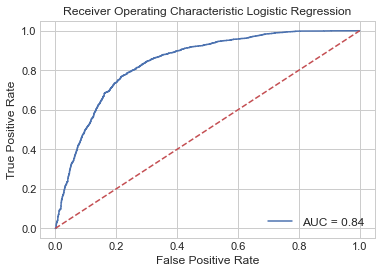

In [38]:
(r0,rx0,ry0)=ROC_plot(logmodel,"Logistic Regression")

#### Cross validation

In [39]:
score0  =cross_val_score(logmodel, X, y, cv=5, scoring='accuracy')# in 5 groups
print('Mean Accuracy Score LR w no parameters: %2f' %(score0.mean()))

Mean Accuracy Score LR w no parameters: 0.790799


### Best hyperparameters given by GridSearchCV package

Grid search is the process of performing  an exhaustive search over specified values in order to determine the optimal hyperparameter values for a given model. 

In [40]:
#classifier
LR = LogisticRegression()

Proving values for max_iter:Maximum number of iterations taken for the solvers to converge (default=100). Values were tested from 100 to 1000 in steps of 5.
We will optimize the solver, the penalty, and the C hyperparameters

In [41]:
params_LR={'max_iter':range(100,1000,100)}
params_LR['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
params_LR['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
params_LR['C'] = [1e-5, 1e-2,1e2]

The package realize cross-validation in 5 groups with "accuracy" as the parameter of scoring

In [42]:
LR_GS = GridSearchCV(
        estimator=LR,
        param_grid=params_LR,
        cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

when fit is applied to the GridSearchCV the best params to give the best accuracy for the test data is searched

In [43]:
LR_result = LR_GS.fit(train_X,train_y)
LR_params = LR_result.best_params_#the resultant best parameters
LR_params

{'C': 100.0, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}

This hiperparameter is used to build a Best Logistic Regression Classifier

In [44]:
best_LR=LogisticRegression(max_iter=LR_params["max_iter"],
                                solver=LR_params["solver"],
                                penalty=LR_params["penalty"],
                                C=LR_params["C"],
                                );
best_LR.fit(train_X,train_y);
print_score(best_LR, train_X, train_y, val_X, val_y, train=False)

Test Result:
accuracy score: 0.7911671924290221

Classification Report: 
 	Precision: 0.8007497116493656
	Recall Score: 0.9019162065605716
	F1 score: 0.8483274782343058

Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |           985 |           691 |
| True T   |           302 |          2777 |
+----------+---------------+---------------+

Relative Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |        0.588  |         0.412 |
| True T   |        0.0981 |         0.902 |
+----------+---------------+---------------+


In [45]:
#saving the result for later
ac1 =accuracy_score(val_y, best_LR.predict(val_X)) 

#### ROC curve

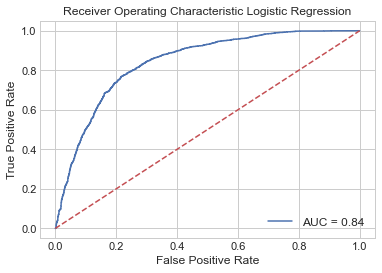

In [46]:
(r1,rx1,ry1)=ROC_plot(best_LR,"Logistic Regression")

#### Cross validation

Let's prove how these values of the hyperparameters work on all the data (not only in the test data). Also, the Cross-validation is performed to validate the slice of data results.

In [47]:
score1  =cross_val_score(best_LR, X, y, cv=5, scoring='accuracy')
print('Mean Accuracy Score LR w best parameters: %2f' %(score1.mean()))

Mean Accuracy Score LR w best parameters: 0.790641


### Best parameter by RandomSearchCV package

GridSearchCV is computationally-time expensive, especially when searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [48]:
lr = LogisticRegression()

Proving values for max_iter:Maximum number of iterations taken for the solvers to converge (default=100). Values were tested from 100 to 1000 in steps of 5

This is a dictionary where names are arguments to the model and values are distributions from which to draw samples. We will optimize the solver, the penalty, and the C hyperparameters of the model with discrete distributions for the solver and penalty type and a log-uniform distribution from 1e-5 to 100 for the C value.

Log-uniform is useful for searching values as we often explore values at different orders of magnitude.

In [49]:
params_lr={'max_iter':range(100,1000,5)}
params_lr['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
params_lr['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
params_lr['C'] = loguniform(1e-5, 100)

In [50]:
lr_RS = RandomizedSearchCV(estimator=lr, param_distributions=params_lr,
                           n_iter = 20, scoring='accuracy', cv =5, verbose=2, random_state=0, n_jobs=-1)

when fit is applied to the GridSearchCV the best params to give the best accuracy for the test data is searched

In [51]:
lr_result = lr_RS.fit(train_X,train_y)
lr_params = lr_result.best_params_
lr_params

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished


{'C': 0.06945356257424773,
 'max_iter': 685,
 'penalty': 'none',
 'solver': 'lbfgs'}

The hyperparameters are used to built a better Logistic Regression Classifier

In [52]:
best_lr=LogisticRegression(max_iter=lr_params["max_iter"],
                                solver=lr_params["solver"],
                                penalty=lr_params["penalty"],
                                C=lr_params["C"],
                                );
best_lr.fit(train_X,train_y);
print_score(best_lr, train_X, train_y, val_X, val_y, train=False)

Test Result:
accuracy score: 0.7911671924290221

Classification Report: 
 	Precision: 0.8007497116493656
	Recall Score: 0.9019162065605716
	F1 score: 0.8483274782343058

Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |           985 |           691 |
| True T   |           302 |          2777 |
+----------+---------------+---------------+

Relative Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |        0.588  |         0.412 |
| True T   |        0.0981 |         0.902 |
+----------+---------------+---------------+


In [53]:
#saving the result for later
ac1b =accuracy_score(val_y, best_lr.predict(val_X)) 

#### ROC curve

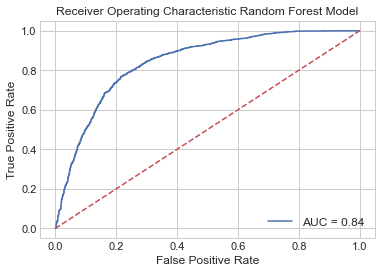

In [54]:
(r1b,rx1b,ry1b)=ROC_plot(best_lr,"Random Forest Model")

#### Cross validation

Let's prove how these values of the hyperparameters work on all the data (not only in the test data). Also, the Cross-validation is performed to validate the slice of data results.

In [55]:
score1b  =cross_val_score(best_lr, X, y, cv=5, scoring='accuracy')
print('Mean Accuracy Score RFC w best parameters: %2f' %(score1b.mean()))

Mean Accuracy Score RFC w best parameters: 0.790641


## Decision Tree Model 🌳

### No boosted parameters

In [56]:
# Specify Model
decision_tree_model = DecisionTreeClassifier(criterion='entropy',random_state = 0)

# Fit Model
decision_tree_model.fit(train_X, train_y)

# Make validation predictions and calculate precition
print_score(decision_tree_model, train_X, train_y, val_X, val_y, train=False)
print(f'leaves:{decision_tree_model.get_n_leaves()}')

Test Result:
accuracy score: 0.8143007360672976

Classification Report: 
 	Precision: 0.8621372031662269
	Recall Score: 0.8489769405651185
	F1 score: 0.8555064637538864

Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |          1258 |           418 |
| True T   |           465 |          2614 |
+----------+---------------+---------------+

Relative Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |         0.751 |         0.249 |
| True T   |         0.151 |         0.849 |
+----------+---------------+---------------+
leaves:1347


In [57]:
#saving the result for later
#pudo ir antes en la función de display de resultados pero me iba a costar tiempo reevaluar
ac2 =accuracy_score(val_y, decision_tree_model.predict(val_X)) 

#### ROC curve

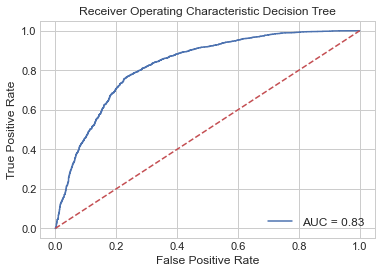

In [58]:
# Make validation predictions and calculate precition
(r2,rx2,ry2)=ROC_trees(val_X,decision_tree_model,best_lr,"Decision Tree")

#### Cross validation

In [59]:
score2  =cross_val_score(decision_tree_model, X, y, cv=5, scoring='accuracy')# in 5 groups
print('Mean Accuracy Score DTC w no parameters: %2f' %(score2.mean()))

Mean Accuracy Score DTC w no parameters: 0.818139


### Best parameters given by GridSearchCV package

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. Also the function preforms cross-validation

In [60]:
DTC = DecisionTreeClassifier(criterion='entropy',random_state = 0)

Proving values for

*max_depth*: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Values were tested from 10 to 50 in steps of 5.

*max_leaf_nodes*: max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes. Values were tested from 10 to 200 in steps of 10.

In [61]:
params_DTC={'max_depth':range(10,50,5), 'max_leaf_nodes':range(10,200,10)}

The package realize cross-validation in 5 groups with "accuracy" as the parameter of scoring

In [62]:
DTC_GS = GridSearchCV(
        estimator=DTC,
        param_grid=params_DTC,
        cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

In [63]:
DTC_result = DTC_GS.fit(train_X,train_y)
DTC_params = DTC_result.best_params_
DTC_params

{'max_depth': 15, 'max_leaf_nodes': 100}

In [64]:
best_DTC=DecisionTreeClassifier(criterion='entropy',random_state = 0,max_depth=DTC_params["max_depth"],max_leaf_nodes=DTC_params["max_leaf_nodes"]);
best_DTC.fit(train_X,train_y);
print_score(best_DTC, train_X, train_y, val_X, val_y, train=False)

Test Result:
accuracy score: 0.8515247108307045

Classification Report: 
 	Precision: 0.8538622129436325
	Recall Score: 0.9298473530367002
	F1 score: 0.89023631840796

Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |          1186 |           490 |
| True T   |           216 |          2863 |
+----------+---------------+---------------+

Relative Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |        0.708  |         0.292 |
| True T   |        0.0702 |         0.93  |
+----------+---------------+---------------+


In [65]:
#saving the result for later
#pudo ir antes en la función de display de resultados pero me iba a costar tiempo reevaluar
ac3 =accuracy_score(val_y, best_DTC.predict(val_X)) 

#### ROC curve

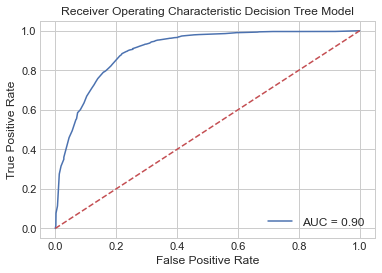

In [66]:
(r3,rx3,ry3)=ROC_plot(best_DTC,"Decision Tree Model")

#### Cross validation

In [67]:
score3  =cross_val_score(best_DTC, X, y, cv=5, scoring='accuracy')
print('Mean Accuracy Score DTC w best parameters: %2f' %(score3.mean()))

Mean Accuracy Score DTC w best parameters: 0.850053


### Best parameter by RandomSearchCV package

GridSearchCV is computationally-time expensive, especially when searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [68]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state = 0)

In [69]:
params_dtc={'max_depth':range(10,50), 'max_leaf_nodes':range(10,200)}

Proving values for

*max_depth*: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Values were tested from 10 to 50.

*max_leaf_nodes*: max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes. Values were tested from 10 to 200.

In [70]:
dtc_RS = RandomizedSearchCV(estimator=dtc, param_distributions=params_dtc, n_iter = 20, scoring='accuracy', cv =5, verbose=2, random_state=0, n_jobs=-1)

In [71]:
dtc_result = dtc_RS.fit(train_X,train_y)
dtc_params = dtc_result.best_params_
dtc_params

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.7s finished


{'max_leaf_nodes': 104, 'max_depth': 45}

In [72]:
best_dtc=DecisionTreeClassifier(criterion='entropy',random_state = 0,
                       max_depth=dtc_params["max_depth"],
                       max_leaf_nodes=dtc_params["max_leaf_nodes"]);

best_dtc.fit(train_X,train_y);
print_score(best_dtc, train_X, train_y, val_X, val_y, train=False)

Test Result:
accuracy score: 0.8511041009463722

Classification Report: 
 	Precision: 0.8533532041728763
	Recall Score: 0.9298473530367002
	F1 score: 0.8899595896798259

Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |          1184 |           492 |
| True T   |           216 |          2863 |
+----------+---------------+---------------+

Relative Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |        0.706  |         0.294 |
| True T   |        0.0702 |         0.93  |
+----------+---------------+---------------+


In [73]:
#saving the result for later
#pudo ir antes en la función de display de resultados pero me iba a costar tiempo reevaluar
ac3b =accuracy_score(val_y, best_dtc.predict(val_X)) 

#### ROC curve

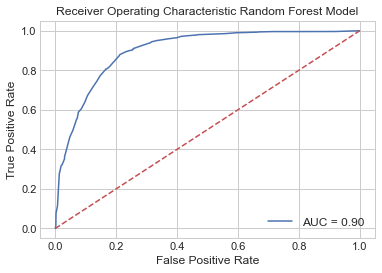

In [74]:
(r3b,rx3b,ry3b)=ROC_plot(best_dtc,"Random Forest Model")

#### Cross validation

In [75]:
score3b  =cross_val_score(best_dtc, X, y, cv=5, scoring='accuracy')
print('Mean Accuracy Score RFC w best parameters: %2f' %(score3b.mean()))

Mean Accuracy Score RFC w best parameters: 0.849790


## Random Forest Model 🌲🌳🌲

### No boosted parameters

In [76]:
# Define the model. Set random_state to 1
rf_model  = RandomForestClassifier(criterion = 'entropy', random_state = 0)

# fit your model
rf_model.fit(train_X, train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
print_score(rf_model, train_X, train_y, val_X, val_y, train=False)
print(f'parameters:{rf_model.get_params()}')

Test Result:
accuracy score: 0.8858044164037855

Classification Report: 
 	Precision: 0.8816977724262492
	Recall Score: 0.951282884053264
	F1 score: 0.9151695047648805

Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |          1283 |           393 |
| True T   |           150 |          2929 |
+----------+---------------+---------------+

Relative Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |        0.766  |         0.234 |
| True T   |        0.0487 |         0.951 |
+----------+---------------+---------------+
parameters:{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 

In [77]:
#saving the result for later
#pudo ir antes en la función de display de resultados pero me iba a costar tiempo reevaluar
ac4 =accuracy_score(val_y, rf_model.predict(val_X)) 

#### ROC curve

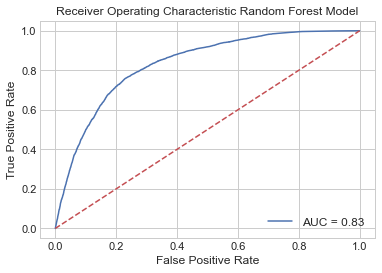

In [78]:
(r4,rx4,ry4)=ROC_trees(val_X,rf_model,best_lr,"Random Forest Model")

#### Cross validation

In [79]:
score4  =cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')# in 5 groups
print('Mean Accuracy Score RFC w no parameters: %2f' %(score4.mean()))

Mean Accuracy Score RFC w no parameters: 0.880967


### Best parameters given by GridSearchCV package

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. Also the function preforms cross-validation

In [80]:
RFC = RandomForestClassifier(criterion='entropy',random_state = 0)

In [81]:
params_RFC= {  'bootstrap': [True], 'max_depth': [5,10,50,100,None],
             'max_features': ['auto', 'log2'], 'n_estimators':[50,100,150,200,250,500,1000]}

Proving values for

*n_estimators*: (default=100)
The number of trees in the forest. Values were tested from 50 to 1000

*bootstrapbool*: (default=True)
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

*max_features*{“auto”, “sqrt”, “log2”}:( default=”auto”)
The number of features to consider when looking for the best split

*max_depth*: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Values were tested from 5 to 100 

The package realize cross-validation in 5 groups with "accuracy" as the parameter of scoring

In [82]:
RFC_GS = GridSearchCV(
        estimator=RFC,
        param_grid=params_RFC,
        cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

In [83]:
RFC_result = RFC_GS.fit(train_X,train_y)
RFC_params = RFC_result.best_params_
RFC_params

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 250}

In [84]:
best_RFC=RandomForestClassifier(criterion='entropy',random_state = 0,
                                bootstrap=RFC_params["bootstrap"],
                                max_depth=RFC_params["max_depth"],
                                max_features=RFC_params["max_features"],
                                n_estimators=RFC_params["n_estimators"],
                                );
best_RFC.fit(train_X,train_y);
print_score(best_RFC, train_X, train_y, val_X, val_y, train=False)

Test Result:
accuracy score: 0.8858044164037855

Classification Report: 
 	Precision: 0.882157926461724
	Recall Score: 0.9506333225073076
	F1 score: 0.9151164608410194

Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |          1285 |           391 |
| True T   |           152 |          2927 |
+----------+---------------+---------------+

Relative Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |        0.767  |         0.233 |
| True T   |        0.0494 |         0.951 |
+----------+---------------+---------------+


In [85]:
#saving the result for later
#pudo ir antes en la función de display de resultados pero me iba a costar tiempo reevaluar
ac5 =accuracy_score(val_y, best_RFC.predict(val_X)) 

#### ROC curve

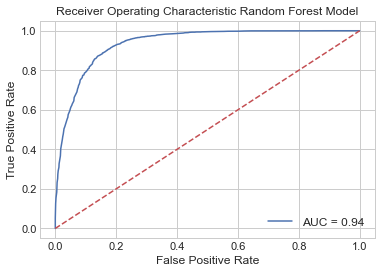

In [86]:
(r5,rx5,ry5)=ROC_plot(best_RFC,"Random Forest Model")

#### Cross validation

In [87]:
score5  =cross_val_score(best_RFC, X, y, cv=5, scoring='accuracy')
print('Mean Accuracy Score RFC w best parameters: %2f' %(score5.mean()))

Mean Accuracy Score RFC w best parameters: 0.881073


### Best parameter by RandomSearchCV package

GridSearchCV is computationally-time expensive, especially when searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [88]:
rfc = RandomForestClassifier(criterion='entropy',random_state = 0)

In [89]:
params_rfc= { 'bootstrap': [True], 'max_depth': list(range(5,100))+[ None],
             'max_features': ['auto', 'log2'], 'n_estimators':range(50,1000)}

Proving values for

*n_estimators*: (default=100)
The number of trees in the forest. Values were tested from 50 to 1000 

*bootstrapbool*: (default=True)
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

*max_features*{“auto”, “sqrt”, “log2”}:( default=”auto”)
The number of features to consider when looking for the best split

*max_depth*: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Values were tested from 10 to 100 

In [90]:
rfc_RS = RandomizedSearchCV(estimator=rfc, param_distributions=params_rfc, n_iter = 20, scoring='accuracy',
                            cv =5, verbose=2, random_state=0, n_jobs=-1)

In [91]:
rfc_result = rfc_RS.fit(train_X,train_y)
rfc_params = rfc_result.best_params_
rfc_params

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 26.5min finished


{'n_estimators': 200,
 'max_features': 'log2',
 'max_depth': 30,
 'bootstrap': True}

In [92]:
best_rfc=RandomForestClassifier(criterion='entropy',random_state = 0,
                                bootstrap=rfc_params["bootstrap"],
                                max_depth=rfc_params["max_depth"],
                                max_features=rfc_params["max_features"],
                                n_estimators=rfc_params["n_estimators"],
                                );
best_rfc.fit(train_X,train_y);
print_score(best_rfc, train_X, train_y, val_X, val_y, train=False)

Test Result:
accuracy score: 0.8843322818086226

Classification Report: 
 	Precision: 0.8826021180030257
	Recall Score: 0.9473855147775252
	F1 score: 0.9138471177944862

Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |          1288 |           388 |
| True T   |           162 |          2917 |
+----------+---------------+---------------+

Relative Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |        0.768  |         0.232 |
| True T   |        0.0526 |         0.947 |
+----------+---------------+---------------+


In [93]:
#saving the result for later
#pudo ir antes en la función de display de resultados pero me iba a costar tiempo reevaluar
ac5b =accuracy_score(val_y, best_rfc.predict(val_X)) 

#### ROC curve

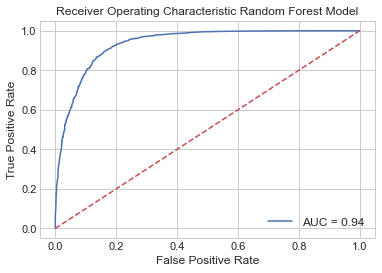

In [94]:
(r5b,rx5b,ry5b)=ROC_plot(best_rfc,"Random Forest Model")

#### Cross validation

In [95]:
score5b  =cross_val_score(best_rfc, X, y, cv=5, scoring='accuracy')
print('Mean Accuracy Score RFC w best parameters: %2f' %(score5b.mean()))

Mean Accuracy Score RFC w best parameters: 0.880652


## Artificial Neural Network  🕸 🧠🧠

### No boosted parameters

This classifier needs standardized data. The data was standardized at the beginning

In [96]:
def build_model():
  model = Sequential()
  #First Hidden Layer
  model.add(Dense(units=16,  kernel_initializer= 'uniform', activation='relu', input_dim=10))
  model.add(Dropout(0.1))
  #Second  Hidden Layer
  model.add(Dense(units=16,  kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(0.1))
  #Output Layer
  model.add(Dense(units=1,  kernel_initializer='uniform', activation='sigmoid'))

  #Compiling the neural network
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

keras_clf = KerasClassifier(build_model,epochs=200, batch_size=100)

In [97]:
classifier=build_model()

In [98]:
history=classifier.fit(train_X, train_y, validation_data=(val_X, val_y),epochs=200, batch_size=100)

Epoch 1/200
143/143 [==============================] - 1s 5ms/step - loss: 0.6293 - accuracy: 0.7385 - val_loss: 0.5028 - val_accuracy: 0.7937
Epoch 2/200
143/143 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.7989 - val_loss: 0.4232 - val_accuracy: 0.8040
Epoch 3/200
143/143 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.8073 - val_loss: 0.4128 - val_accuracy: 0.8111
Epoch 4/200
143/143 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8125 - val_loss: 0.4012 - val_accuracy: 0.8244
Epoch 5/200
143/143 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8210 - val_loss: 0.3913 - val_accuracy: 0.8290
Epoch 6/200
143/143 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8235 - val_loss: 0.3828 - val_accuracy: 0.8355
Epoch 7/200
143/143 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8292 - val_loss: 0.3779 - val_accuracy: 0.8376

Epoch 58/200
143/143 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8660 - val_loss: 0.3106 - val_accuracy: 0.8694
Epoch 59/200
143/143 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8629 - val_loss: 0.3110 - val_accuracy: 0.8681
Epoch 60/200
143/143 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8637 - val_loss: 0.3101 - val_accuracy: 0.8679
Epoch 61/200
143/143 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8646 - val_loss: 0.3098 - val_accuracy: 0.8711
Epoch 62/200
143/143 [==============================] - 0s 2ms/step - loss: 0.3252 - accuracy: 0.8644 - val_loss: 0.3084 - val_accuracy: 0.8709
Epoch 63/200
143/143 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.8637 - val_loss: 0.3095 - val_accuracy: 0.8719
Epoch 64/200
143/143 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8634 - val_loss: 0.3089 - val_accuracy:

143/143 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8691 - val_loss: 0.3041 - val_accuracy: 0.8715
Epoch 171/200
143/143 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8676 - val_loss: 0.3026 - val_accuracy: 0.8726
Epoch 172/200
143/143 [==============================] - 0s 2ms/step - loss: 0.3141 - accuracy: 0.8680 - val_loss: 0.3042 - val_accuracy: 0.8751
Epoch 173/200
143/143 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.8677 - val_loss: 0.3046 - val_accuracy: 0.8728
Epoch 174/200
143/143 [==============================] - 0s 2ms/step - loss: 0.3113 - accuracy: 0.8714 - val_loss: 0.3029 - val_accuracy: 0.8717
Epoch 175/200
143/143 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8695 - val_loss: 0.3026 - val_accuracy: 0.8744
Epoch 176/200
143/143 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8691 - val_loss: 0.3030 - val_accuracy: 0.8734

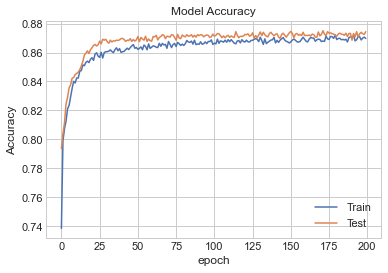

In [99]:
figsize=(30,20)
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'])
plt.show()


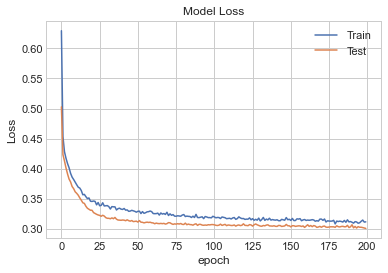

In [100]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'])
plt.show()

Confusion matrix:

In [101]:
# Predicting the Test set results
y_pred = classifier.predict(val_X)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
cm = confusion_matrix(val_y, y_pred)
#sns.heatmap(cm,annot=True)
print(cm)
print()
ac6=(cm[0][0] + cm[1][1])/sum(sum(cm))
print(f"The accuracy is {ac6}")

[[1229  447]
 [ 150 2929]]

The accuracy is 0.8744479495268139


It is too computational expensive to re-run this classificator to reevaluate and produce the formated confusion matrix, but it follows the same format of the other matrices:

|          |   Predicted F |   Predicted T |
|-----------|-------------|-------------|
| True F   |          1229 |           447 |
| True T   |           150 |          2929 |


#### ROC curve

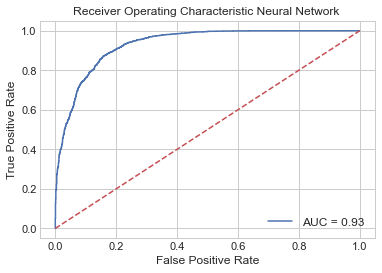

In [102]:
# tree
probs = classifier.predict(val_X)
preds = probs#this line changes respect to the one in the function. thats why I cant use the function to plot this
fprdtree, tprdtree, thresholddtree = roc_curve(val_y, preds)
roc_aucdtree = auc(fprdtree, tprdtree)

plt.plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Neural Network ',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.legend(loc = 'lower right', prop={'size': 12})
plt.show()
r6=roc_aucdtree
rx6=fprdtree
ry6=tprdtree

#### Cross validation

In [103]:
#Scalling the data:
sc1 = StandardScaler()
X_s = sc1.fit_transform(X)
with HiddenPrints():
  score6 = cross_val_score(estimator=keras_clf, scoring="accuracy", X=X_s, y=y)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [104]:
print('Mean Accuracy Score ANN w no parameters: %2f' %(score6.mean()))

Mean Accuracy Score ANN w no parameters: 0.830179


### Best parameters given by GridSearchCV package

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. Also the function preforms cross-validation

In [105]:
def build_model(optimizer,kernel, units):
    model = Sequential()
    #First Hidden Layer
    model.add(Dense(units=units,  kernel_initializer= kernel, activation='relu', input_dim=10))
    model.add(Dropout(0.1))
    #Second  Hidden Layer
    model.add(Dense(units=units,  kernel_initializer=kernel, activation='relu'))
    model.add(Dropout(0.1))
    #Output Layer
    model.add(Dense(units=1,  kernel_initializer=kernel, activation='sigmoid'))

    #Compiling the neural network
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

keras_clf = KerasClassifier(build_model)#,epochs=200, batch_size=100)

Proving values for



In [106]:
parameters ={'batch_size':[10,100,150],
            'epochs':[10,100,200],
            'optimizer':['adam','rmsprop','SGD'],
            'kernel':['uniform'],
            'units':[4,8,16]}

The *batch_size* is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

The number of *epochs* is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

The *kernel* is a filter that is used to extract the features. The kernel is a matrix that moves over the input data, performs the dot product with the sub-region of input data, and gets the output as the matrix of dot products.

*Optimizers* are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses.

The package realize cross validation in 5 groups with "accuracy" as the parameter of scoring

In [107]:
ANN_GC = GridSearchCV(estimator=keras_clf,
                          param_grid=parameters,
                          cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

In [109]:
ANN_result = ANN_GC.fit(train_X,train_y);
ANN_params = ANN_result.best_params_
ANN_params

Epoch 1/200
96/96 [==============================] - 3s 27ms/step - loss: 0.6564 - accuracy: 0.7136
Epoch 2/200
96/96 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.7925
Epoch 3/200
96/96 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.8029
Epoch 4/200
96/96 [==============================] - 1s 6ms/step - loss: 0.4166 - accuracy: 0.8108
Epoch 5/200
96/96 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8177
Epoch 6/200
96/96 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8229
Epoch 7/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.8303
Epoch 8/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8318
Epoch 9/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.8368
Epoch 10/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.8415
Epoch 11

96/96 [==============================] - 0s 1ms/step - loss: 0.3125 - accuracy: 0.8695
Epoch 164/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8676
Epoch 165/200
96/96 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.8707
Epoch 166/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8686
Epoch 167/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8721
Epoch 168/200
96/96 [==============================] - 0s 1ms/step - loss: 0.3121 - accuracy: 0.8714
Epoch 169/200
96/96 [==============================] - 0s 1ms/step - loss: 0.3108 - accuracy: 0.8711
Epoch 170/200
96/96 [==============================] - 0s 1ms/step - loss: 0.3113 - accuracy: 0.8676
Epoch 171/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8695
Epoch 172/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8693
Epoc

{'batch_size': 150,
 'epochs': 200,
 'kernel': 'uniform',
 'optimizer': 'adam',
 'units': 16}

In [110]:
classifier=build_model(ANN_params["optimizer"],ANN_params["kernel"],ANN_params["units"])

In [111]:
history=classifier.fit(train_X, train_y, validation_data=(val_X, val_y),epochs=ANN_params["epochs"], batch_size=ANN_params["batch_size"])

Epoch 1/200
96/96 [==============================] - 6s 64ms/step - loss: 0.6470 - accuracy: 0.6977 - val_loss: 0.5391 - val_accuracy: 0.7647
Epoch 2/200
96/96 [==============================] - 1s 9ms/step - loss: 0.4634 - accuracy: 0.7942 - val_loss: 0.4225 - val_accuracy: 0.8053
Epoch 3/200
96/96 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.8107 - val_loss: 0.4052 - val_accuracy: 0.8196
Epoch 4/200
96/96 [==============================] - 1s 9ms/step - loss: 0.4072 - accuracy: 0.8172 - val_loss: 0.3960 - val_accuracy: 0.8254
Epoch 5/200
96/96 [==============================] - 0s 3ms/step - loss: 0.3970 - accuracy: 0.8255 - val_loss: 0.3861 - val_accuracy: 0.8309
Epoch 6/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8320 - val_loss: 0.3793 - val_accuracy: 0.8387
Epoch 7/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8355 - val_loss: 0.3739 - val_accuracy: 0.8402
Epoch 8/200


Epoch 59/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8647 - val_loss: 0.3145 - val_accuracy: 0.8711
Epoch 60/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8639 - val_loss: 0.3156 - val_accuracy: 0.8719
Epoch 61/200
96/96 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.8637 - val_loss: 0.3143 - val_accuracy: 0.8707
Epoch 62/200
96/96 [==============================] - 0s 4ms/step - loss: 0.3258 - accuracy: 0.8665 - val_loss: 0.3137 - val_accuracy: 0.8705
Epoch 63/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8663 - val_loss: 0.3133 - val_accuracy: 0.8707
Epoch 64/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8646 - val_loss: 0.3142 - val_accuracy: 0.8707
Epoch 65/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3242 - accuracy: 0.8676 - val_loss: 0.3139 - val_accuracy: 0.8709
Epoch 

96/96 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.8703 - val_loss: 0.3057 - val_accuracy: 0.8740
Epoch 174/200
96/96 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.8690 - val_loss: 0.3079 - val_accuracy: 0.8742
Epoch 175/200
96/96 [==============================] - 0s 4ms/step - loss: 0.3150 - accuracy: 0.8704 - val_loss: 0.3069 - val_accuracy: 0.8723
Epoch 176/200
96/96 [==============================] - 0s 3ms/step - loss: 0.3120 - accuracy: 0.8693 - val_loss: 0.3069 - val_accuracy: 0.8742
Epoch 177/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3111 - accuracy: 0.8696 - val_loss: 0.3052 - val_accuracy: 0.8755
Epoch 178/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8719 - val_loss: 0.3064 - val_accuracy: 0.8751
Epoch 179/200
96/96 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8706 - val_loss: 0.3060 - val_accuracy: 0.8747
Epoch 180/200

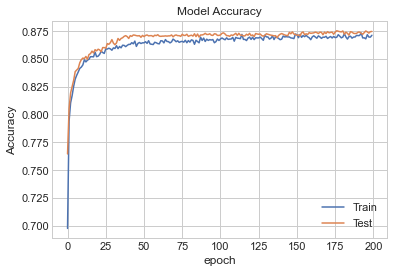

In [112]:
figsize=(30,20)
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'])
plt.show()


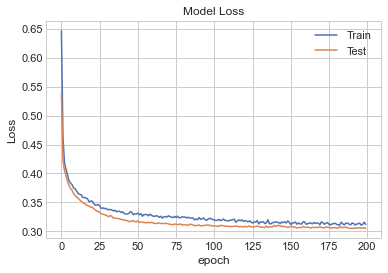

In [113]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'])
plt.show()

Confusion matrix:

In [114]:
# Predicting the Test set results
y_pred = classifier.predict(val_X)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
cm = confusion_matrix(val_y, y_pred)
#sns.heatmap(cm,annot=True)
print(cm)
print()
ac7=(cm[0][0] + cm[1][1])/sum(sum(cm))
print(f"The accuracy is {ac7}")

[[1222  454]
 [ 141 2938]]

The accuracy is 0.8748685594111462


It is too computational expensive to re-run this classificator to reevaluate and produce the formated confusion matrix, but it follows the same format of the other matrices:

|          |   Predicted F |   Predicted T |
|-----------|-------------|-------------|
| True F   |          1222 |           454 |
| True T   |           141 |          2938 |

#### ROC curve

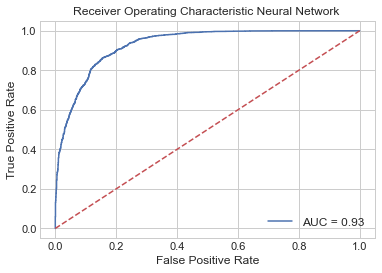

In [115]:
# tree
probs = classifier.predict(val_X)
preds = probs
fprd, tprd, threshold = roc_curve(val_y, preds)
roc_aucd = auc(fprd, tprd)

plt.plot(fprd, tprd, 'b', label = 'AUC = %0.2f' % roc_aucd)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Neural Network ',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.legend(loc = 'lower right', prop={'size': 12})
r7=roc_aucd
rx7=fprd
ry7=tprd
plt.show()

#### Cross validation

In [116]:
def build_model_CV_best():
    optimizer=ANN_params["optimizer"]
    kernel=ANN_params["kernel"]
    units=ANN_params["units"]
    model = Sequential()
    #First Hidden Layer
    model.add(Dense(units=units,  kernel_initializer= kernel, activation='relu', input_dim=10))
    model.add(Dropout(0.1))
    #Second  Hidden Layer
    model.add(Dense(units=units,  kernel_initializer=kernel, activation='relu'))
    model.add(Dropout(0.1))
    #Output Layer
    model.add(Dense(units=1,  kernel_initializer=kernel, activation='sigmoid'))

    #Compiling the neural network
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

keras_clfCV_best = KerasClassifier(build_model_CV_best,epochs=ANN_params["epochs"], batch_size=ANN_params["batch_size"])

In [117]:
with HiddenPrints():
  score7 = cross_val_score(estimator=keras_clfCV_best,  X=X_s, y=y,cv=5, scoring='accuracy')

In [118]:
print('Mean Accuracy Score ANN w best parameters: %2f' %(score7.mean()))

Mean Accuracy Score ANN w best parameters: 0.817876


### Best parameter by RandomSearchCV package

GridSearchCV is computationally-time expensive, especially when searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [119]:
def build_model(optimizer,kernel, units):
    model = Sequential()
    #First Hidden Layer
    model.add(Dense(units=units,  kernel_initializer= kernel, activation='relu', input_dim=10))
    model.add(Dropout(0.1))
    #Second  Hidden Layer
    model.add(Dense(units=units,  kernel_initializer=kernel, activation='relu'))
    model.add(Dropout(0.1))
    #Output Layer
    model.add(Dense(units=1,  kernel_initializer=kernel, activation='sigmoid'))

    #Compiling the neural network
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

keras_clf = KerasClassifier(build_model)#,epochs=200, batch_size=100)

Proving values for



In [120]:
params_ann ={'batch_size':range(10,150),
            'epochs':range(10,200),
            'optimizer':['adam','rmsprop','SGD'],
            'kernel':['uniform'],
            'units':range(4,16)}

The *batch_size* is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.

The number of *epochs* is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

The *kernel* is a filter that is used to extract the features. The kernel is a matrix that moves over the input data, performs the dot product with the sub-region of input data, and gets the output as the matrix of dot products.

*Optimizers* are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses.

The package realize cross-validation in 5 groups with "accuracy" as the parameter of scoring

In [121]:
ann_RS = RandomizedSearchCV(estimator=keras_clf, param_distributions=params_ann, n_iter = 20, scoring='accuracy', cv =5, verbose=2, random_state=0, n_jobs=-1)

In [122]:
ann_result = ann_RS.fit(train_X,train_y)
ann_params = ann_result.best_params_
ann_params

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 24.5min finished


Epoch 1/98
265/265 [==============================] - 0s 1ms/step - loss: 0.5474 - accuracy: 0.7442
Epoch 2/98
265/265 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.8066
Epoch 3/98
265/265 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8193
Epoch 4/98
265/265 [==============================] - 0s 1ms/step - loss: 0.3930 - accuracy: 0.8299
Epoch 5/98
265/265 [==============================] - 0s 1ms/step - loss: 0.3865 - accuracy: 0.8351: 0s - loss: 0.3876 - accuracy: 0.
Epoch 6/98
265/265 [==============================] - 0s 1ms/step - loss: 0.3849 - accuracy: 0.8393
Epoch 7/98
265/265 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8399
Epoch 8/98
265/265 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8451
Epoch 9/98
265/265 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.8461: 0s - loss: 0.3712 - accuracy: 0.84
Epoch 10/98
265/265 [=========

{'units': 13,
 'optimizer': 'adam',
 'kernel': 'uniform',
 'epochs': 98,
 'batch_size': 54}

In [123]:
classifier=build_model(ann_params["optimizer"],ann_params["kernel"],ann_params["units"])

In [124]:
history=classifier.fit(train_X, train_y, validation_data=(val_X, val_y),
                       epochs=ann_params["epochs"], batch_size=ann_params["batch_size"])

Epoch 1/98
265/265 [==============================] - 1s 2ms/step - loss: 0.5570 - accuracy: 0.7675 - val_loss: 0.4281 - val_accuracy: 0.7996
Epoch 2/98
265/265 [==============================] - 0s 1ms/step - loss: 0.4270 - accuracy: 0.8060 - val_loss: 0.4090 - val_accuracy: 0.8164
Epoch 3/98
265/265 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8154 - val_loss: 0.3958 - val_accuracy: 0.8284
Epoch 4/98
265/265 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8243 - val_loss: 0.3857 - val_accuracy: 0.8330
Epoch 5/98
265/265 [==============================] - 0s 1ms/step - loss: 0.3928 - accuracy: 0.8328 - val_loss: 0.3760 - val_accuracy: 0.8391
Epoch 6/98
265/265 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8315 - val_loss: 0.3714 - val_accuracy: 0.8431
Epoch 7/98
265/265 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8372 - val_loss: 0.3697 - val_accuracy: 0.8446
Epoch 

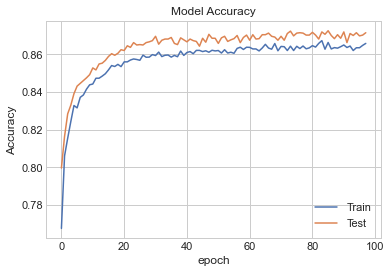

In [125]:
figsize=(30,20)
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'])
plt.show()


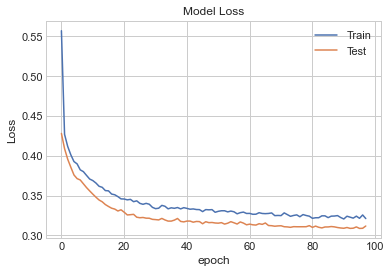

In [126]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'])
plt.show()

Confusion matrix:

In [127]:
# Predicting the Test set results
y_pred = classifier.predict(val_X)
y_pred = (y_pred > 0.5)
# Making the Confusion Matrix
cm = confusion_matrix(val_y, y_pred)
#sns.heatmap(cm,annot=True)
print(cm)
print()
ac7b=(cm[0][0] + cm[1][1])/sum(sum(cm))
print(f"The accuracy is {ac7b}")

[[1213  463]
 [ 148 2931]]

The accuracy is 0.871503680336488


It is too computational expensive to re-run this classificator to reevaluate and produce the formated confusion matrix, but it follows the same format of the other matrices:

|          |   Predicted F |   Predicted T |
|-----------|-------------|-------------|
| True F   |          1213 |           463 |
| True T   |           148 |          2931 |

#### ROC curve

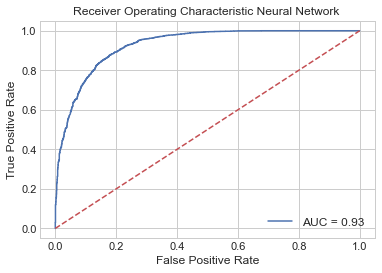

In [128]:

probs = classifier.predict(val_X)
preds = probs
fprd, tprd, thresholdd = roc_curve(val_y, preds)
roc_aucd = auc(fprd, tprd)

plt.plot(fprd, tprd, 'b', label = 'AUC = %0.2f' % roc_aucd)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic Neural Network ',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)
plt.legend(loc = 'lower right', prop={'size': 12})
r7b=roc_aucd
rx7b=fprd
ry7b=tprd
plt.show()

#### Cross validation

In [129]:
def build_model_CV_best():
    optimizer=ann_params["optimizer"]
    kernel=ann_params["kernel"]
    units=ann_params["units"]
    model = Sequential()
    #First Hidden Layer
    model.add(Dense(units=units,  kernel_initializer= kernel, activation='relu', input_dim=10))
    model.add(Dropout(0.1))
    #Second  Hidden Layer
    model.add(Dense(units=units,  kernel_initializer=kernel, activation='relu'))
    model.add(Dropout(0.1))
    #Output Layer
    model.add(Dense(units=1,  kernel_initializer=kernel, activation='sigmoid'))

    #Compiling the neural network
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

keras_clfCV_best = KerasClassifier(build_model_CV_best,epochs=ann_params["epochs"], batch_size=ann_params["batch_size"])

In [130]:
with HiddenPrints():
  score7b = cross_val_score(estimator=keras_clfCV_best,  X=X_s, y=y,cv=5, scoring='accuracy')

In [131]:
print('Mean Accuracy Score ANN w best parameters: %2f' %(score7b.mean()))

Mean Accuracy Score ANN w best parameters: 0.826183


## Gradient Boost Classifier

### No boosted parameters

In [132]:
gbc = GradientBoostingClassifier()
gbc.fit(train_X, train_y)

# Make validation predictions and calculate precition
print_score(gbc, train_X, train_y, val_X, val_y, train=False)

Test Result:
accuracy score: 0.8719242902208202

Classification Report: 
 	Precision: 0.8662514827995255
	Recall Score: 0.9486846378694381
	F1 score: 0.9055960316230042

Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |          1225 |           451 |
| True T   |           158 |          2921 |
+----------+---------------+---------------+

Relative Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |        0.731  |         0.269 |
| True T   |        0.0513 |         0.949 |
+----------+---------------+---------------+


In [133]:
#saving the result for later
#pudo ir antes en la función de display de resultados pero me iba a costar tiempo reevaluar
ac8 =accuracy_score(val_y, gbc.predict(val_X)) 

#### ROC curve

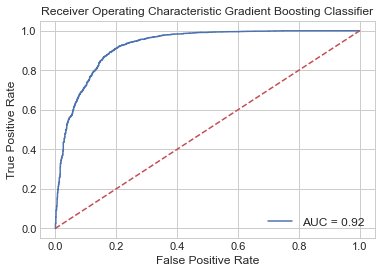

In [134]:
(r8,rx8,ry8)=ROC_plot(gbc,'Gradient Boosting Classifier')

#### Cross validation

In [135]:
score8  =cross_val_score(gbc, X, y, cv=5, scoring='accuracy')# in 5 groups
print('Mean Accuracy Score GBC w no parameters: %2f' %(score8.mean()))

Mean Accuracy Score GBC w no parameters: 0.870978


### Best parameters given by GridSearchCV package

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. Also the function preforms cross-validation

In [136]:
GBC = GradientBoostingClassifier(random_state = 0)

Proving values for

*n_estimators*: (default=100)
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

*learning_rate*: (default=0.1)
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

*max_depth*: (default=3)
maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

In [137]:
params_GBC={'n_estimators':range(50,200,50), 
            'learning_rate':[0.05, 0.5, 1], 
            'max_depth':[2,3,4]}

The package realize cross-validation in 5 groups with "accuracy" as the parameter of scoring

In [138]:
GBC_GS = GridSearchCV(
        estimator=GBC,
        param_grid=params_GBC,
        cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

In [139]:
GBC_result = GBC_GS.fit(train_X,train_y)
GBC_params = GBC_result.best_params_
GBC_params

{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50}

In [140]:
best_GBC=GradientBoostingClassifier(random_state = 0,
                                    n_estimators=GBC_params["n_estimators"],learning_rate=GBC_params["learning_rate"],
                                    max_depth=GBC_params['max_depth'])
best_GBC.fit(train_X,train_y);
print_score(best_GBC, train_X, train_y, val_X, val_y, train=False)

Test Result:
accuracy score: 0.8797055730809674

Classification Report: 
 	Precision: 0.8804248861911987
	Recall Score: 0.9421890224098733
	F1 score: 0.9102604330090994

Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |          1282 |           394 |
| True T   |           178 |          2901 |
+----------+---------------+---------------+

Relative Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |        0.765  |         0.235 |
| True T   |        0.0578 |         0.942 |
+----------+---------------+---------------+


In [141]:
#saving the result for later
#pudo ir antes en la función de display de resultados pero me iba a costar tiempo reevaluar
ac9 =accuracy_score(val_y, best_GBC.predict(val_X)) 

#### ROC curve

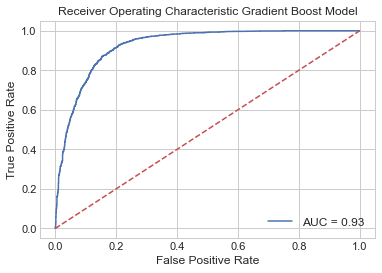

In [142]:
(r9,rx9,ry9)=ROC_plot(best_GBC,"Gradient Boost Model")

#### Cross validation

In [143]:
score9  =cross_val_score(best_GBC, X, y, cv=5, scoring='accuracy')
print('Mean Accuracy Score GBC w best parameters: %2f' %(score9.mean()))

Mean Accuracy Score GBC w best parameters: 0.871609


### Best parameter by RandomSearchCV package

GridSearchCV is computationally-time expensive, especially when searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [144]:
gbc = GradientBoostingClassifier(random_state = 0)

Proving values for

*n_estimators*: (default=100)
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

*learning_rate*: (default=0.1)
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.

*max_depth*: (default=3)
maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

In [145]:
params_gbc={'n_estimators':range(50,200), 
            'learning_rate':[i/100. for i in range(5,101)], 
            'max_depth':range(2,4)}

Proving values for



The package realize cross-validation in 5 groups with "accuracy" as the parameter of scoring

In [146]:
gbc_RS = RandomizedSearchCV(estimator=gbc, param_distributions=params_gbc,
                            n_iter = 20, scoring='accuracy', cv =5, verbose=2, random_state=0, n_jobs=-1)

In [147]:
gbc_result = gbc_RS.fit(train_X,train_y)
gbc_params = gbc_result.best_params_
gbc_params

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.1min finished


{'n_estimators': 180, 'max_depth': 2, 'learning_rate': 0.56}

In [148]:
best_gbc=GradientBoostingClassifier(random_state = 0,
                                    n_estimators=gbc_params["n_estimators"],learning_rate=gbc_params["learning_rate"],
                                    max_depth=gbc_params['max_depth'])
best_gbc.fit(train_X,train_y);
print_score(best_gbc, train_X, train_y, val_X, val_y, train=False)

Test Result:
accuracy score: 0.8792849631966351

Classification Report: 
 	Precision: 0.8829104249464995
	Recall Score: 0.9379668723611562
	F1 score: 0.9096062992125984

Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |          1293 |           383 |
| True T   |           191 |          2888 |
+----------+---------------+---------------+

Relative Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |         0.771 |         0.229 |
| True T   |         0.062 |         0.938 |
+----------+---------------+---------------+


In [149]:
#saving the result for later
#pudo ir antes en la función de display de resultados pero me iba a costar tiempo reevaluar
ac9b =accuracy_score(val_y, best_gbc.predict(val_X)) 

#### ROC curve

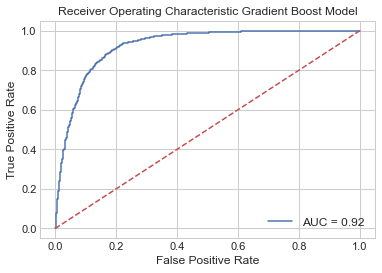

In [150]:
(r9b,rx9b,ry9b)=ROC_plot(best_gbc,"Gradient Boost Model")

#### Cross validation

In [151]:
score9b  =cross_val_score(best_gbc, X, y, cv=5, scoring='accuracy')
print('Mean Accuracy Score GBC w best parameters: %2f' %(score9b.mean()))

Mean Accuracy Score GBC w best parameters: 0.875815


## K-Near Neighbors

### No boosted parameters

In [152]:
KNC = KNeighborsClassifier()
KNC.fit(train_X, train_y)

# Make validation predictions and calculate precition
print_score(KNC, train_X, train_y, val_X, val_y, train=False)

Test Result:
accuracy score: 0.8317560462670873

Classification Report: 
 	Precision: 0.8251069900142654
	Recall Score: 0.9392659954530692
	F1 score: 0.8784933171324423

Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |          1063 |           613 |
| True T   |           187 |          2892 |
+----------+---------------+---------------+

Relative Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |        0.634  |         0.366 |
| True T   |        0.0607 |         0.939 |
+----------+---------------+---------------+


In [153]:
#saving the result for later
#pudo ir antes en la función de display de resultados pero me iba a costar tiempo reevaluar
ac10 =accuracy_score(val_y, KNC.predict(val_X)) 

#### ROC curve

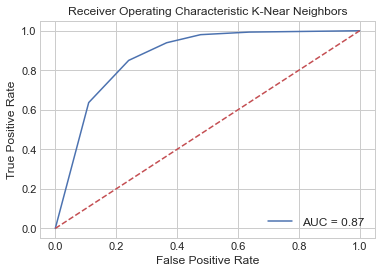

In [154]:
(r10,rx10,ry10)=ROC_plot(KNC,'K-Near Neighbors')

#### Cross validation

In [155]:
score10  =cross_val_score(KNC, X, y, cv=5, scoring='accuracy')# in 5 groups
print('Mean Accuracy Score KNN w no parameters: %2f' %(score10.mean()))

Mean Accuracy Score KNN w no parameters: 0.838223


### Best parameters given by GridSearchCV package

Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. Also the function preforms cross-validation

In [156]:
KNN = KNeighborsClassifier()

Proving values for
 *n_neighbors*:  k near elements

In [157]:
params_KNN = {'n_neighbors':range(2,51)}#he tratado hasta 500 pero sigue saliendo 14

The package realize cross-validation in 5 groups with "accuracy" as the parameter of scoring

In [158]:
KNN_GS = GridSearchCV(
        estimator=KNN,
        param_grid=params_KNN,
        cv=5, scoring='accuracy', verbose=0, n_jobs=-1)

In [159]:
KNN_result = KNN_GS.fit(train_X,train_y)
KNN_params = KNN_result.best_params_
KNN_params

{'n_neighbors': 12}

In [160]:
best_KNN= KNeighborsClassifier(
                                    n_neighbors=KNN_params["n_neighbors"])
best_KNN.fit(train_X,train_y);
print_score(best_KNN, train_X, train_y, val_X, val_y, train=False)

Test Result:
accuracy score: 0.8401682439537329

Classification Report: 
 	Precision: 0.8330939385234128
	Recall Score: 0.9418642416368951
	F1 score: 0.8841463414634148

Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |          1095 |           581 |
| True T   |           179 |          2900 |
+----------+---------------+---------------+

Relative Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |        0.653  |         0.347 |
| True T   |        0.0581 |         0.942 |
+----------+---------------+---------------+


In [161]:
#saving the result for later
#pudo ir antes en la función de display de resultados pero me iba a costar tiempo reevaluar
ac11 =accuracy_score(val_y, best_KNN.predict(val_X)) 

#### ROC curve

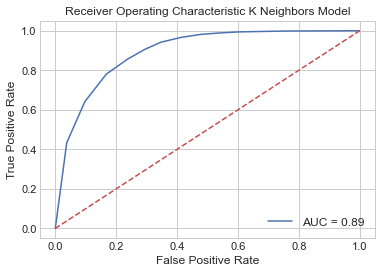

In [162]:
(r11,rx11,ry11)=ROC_plot(best_KNN,"K Neighbors Model")

#### Cross validation

In [163]:
score11  =cross_val_score(best_KNN, X, y, cv=5, scoring='accuracy')
print('Mean Accuracy Score KNN w best parameters: %2f' %(score11.mean()))

Mean Accuracy Score KNN w best parameters: 0.842482


### Best parameter by RandomSearchCV package

GridSearchCV is computationally-time expensive, especially when searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use RandomizedSearchCV, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [164]:
knn = KNeighborsClassifier()

Proving values for
 *n_neighbors*:  k near elements

In [165]:
params_knn = {'n_neighbors':range(2,500)}

The package realize cross-validation in 5 groups with "accuracy" as the parameter of scoring

In [166]:
knn_RS = RandomizedSearchCV(estimator=knn, param_distributions=params_knn,
                            n_iter = 20, scoring='accuracy', cv =5, verbose=2, random_state=0, n_jobs=-1)

In [167]:
knn_result = knn_RS.fit(train_X,train_y)
knn_params = knn_result.best_params_
knn_params

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


{'n_neighbors': 17}

In [168]:
best_knn= KNeighborsClassifier(
                                    n_neighbors=knn_params["n_neighbors"])
best_knn.fit(train_X,train_y);
print_score(best_knn, train_X, train_y, val_X, val_y, train=False)

Test Result:
accuracy score: 0.8372239747634069

Classification Report: 
 	Precision: 0.8191636665743561
	Recall Score: 0.960701526469633
	F1 score: 0.884304932735426

Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |          1023 |           653 |
| True T   |           121 |          2958 |
+----------+---------------+---------------+

Relative Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |        0.61   |         0.39  |
| True T   |        0.0393 |         0.961 |
+----------+---------------+---------------+


In [169]:
#saving the result for later
#pudo ir antes en la función de display de resultados pero me iba a costar tiempo reevaluar
ac11b =accuracy_score(val_y, best_knn.predict(val_X)) 

#### ROC curve

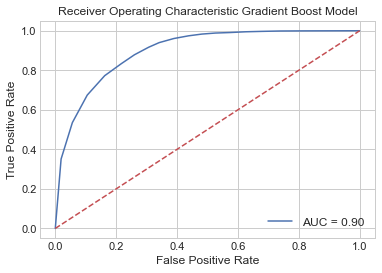

In [170]:
(r11b,rx11b,ry11b)=ROC_plot(best_knn,"Gradient Boost Model")

#### Cross validation

In [171]:
score11b  =cross_val_score(best_knn, X, y, cv=5, scoring='accuracy')
print('Mean Accuracy Score GBC w best parameters: %2f' %(score11b.mean()))

Mean Accuracy Score GBC w best parameters: 0.838486


#  Comparing all models

## Comparison of  accuracy of the split test data-validation data

In [172]:
#Organizando todos los scores que habia obtenido antes
scores=[]
classific=["Logistic Regression","Decisition tree","Random Forest","Artifitial Neural Network","Gradient Boost Classifier","K-Near Neighbors"]
for i in range(0,12,2):
  scores.append([classific[int(i/2)],eval('ac'+str(i)),eval('ac'+str(i+1)),eval('ac'+str(i+1)+'b')])
title=["Classificator","Accuracy w/n parameters","Accuracy w parameters GSV","Accuracy w parameters RSV"]

print(tabulate(scores, headers=title,numalign="left",floatfmt="1.3e",tablefmt="github"))

| Classificator             | Accuracy w/n parameters   | Accuracy w parameters GSV   | Accuracy w parameters RSV   |
|---------------------------|---------------------------|-----------------------------|-----------------------------|
| Logistic Regression       | 7.912e-01                 | 7.912e-01                   | 7.912e-01                   |
| Decisition tree           | 8.143e-01                 | 8.515e-01                   | 8.511e-01                   |
| Random Forest             | 8.858e-01                 | 8.858e-01                   | 8.843e-01                   |
| Artifitial Neural Network | 8.744e-01                 | 8.749e-01                   | 8.715e-01                   |
| Gradient Boost Classifier | 8.719e-01                 | 8.797e-01                   | 8.793e-01                   |
| K-Near Neighbors          | 8.318e-01                 | 8.402e-01                   | 8.372e-01                   |


| Classificator             | Accuracy w/n parameters   | Accuracy w parameters GSV   | Accuracy w parameters RSV   |
|---------------------------|---------------------------|-----------------------------|-----------------------------|
| Logistic Regression       | 7.912e-01                 | 7.912e-01                   | 7.912e-01                   |
| Decisition tree           | 8.143e-01                 | 8.515e-01                   | 8.511e-01                   |
| Random Forest             | 8.858e-01                 | 8.858e-01                   | 8.843e-01                   |
| Artifitial Neural Network | 8.744e-01                 | 8.749e-01                   | 8.715e-01                   |
| Gradient Boost Classifier | 8.719e-01                 | 8.797e-01                   | 8.793e-01                   |
| K-Near Neighbors          | 8.318e-01                 | 8.402e-01                   | 8.372e-01                   |

The best Classifier, in terms of accuracy, for this division of test-validation is the Random Forest. There is not noticeable improvement when tunned parameters are used.

## Comparison of AUC done with the split test data-validation data

In [173]:
#Organizando todos los scores que habia obtenido antes
scores=[]

for i in range(0,12,2):
  scores.append([classific[int(i/2)],eval('r'+str(i)),eval('r'+str(i+1)),eval('r'+str(i+1)+'b')])
title=["Classificator","AUC w/n parameters","AUC w parameters GSV","AUC w parameters RSV"]

print(tabulate(scores, headers=title,numalign="left",floatfmt="1.3e",tablefmt="github"))

| Classificator             | AUC w/n parameters   | AUC w parameters GSV   | AUC w parameters RSV   |
|---------------------------|----------------------|------------------------|------------------------|
| Logistic Regression       | 8.412e-01            | 8.412e-01              | 8.412e-01              |
| Decisition tree           | 8.269e-01            | 9.012e-01              | 9.003e-01              |
| Random Forest             | 8.323e-01            | 9.363e-01              | 9.360e-01              |
| Artifitial Neural Network | 9.312e-01            | 9.294e-01              | 9.273e-01              |
| Gradient Boost Classifier | 9.239e-01            | 9.260e-01              | 9.243e-01              |
| K-Near Neighbors          | 8.705e-01            | 8.923e-01              | 8.974e-01              |


| Classificator             | AUC w/n parameters   | AUC w parameters GSV   | AUC w parameters RSV   |
|---------------------------|----------------------|------------------------|------------------------|
| Logistic Regression       | 8.412e-01            | 8.412e-01              | 8.412e-01              |
| Decisition tree           | 8.269e-01            | 9.012e-01              | 9.003e-01              |
| Random Forest             | 8.323e-01            | 9.363e-01              | 9.360e-01              |
| Artifitial Neural Network | 9.312e-01            | 9.294e-01              | 9.273e-01              |
| Gradient Boost Classifier | 9.239e-01            | 9.260e-01              | 9.243e-01              |
| K-Near Neighbors          | 8.705e-01            | 8.923e-01              | 8.974e-01              |

The best Classifier, in terms of AUC, for this division of test-validation is the Random Forest. There is a noticeable improvement when tunned parameters are used, specially whith GridSearchCV.

## Comparison of mean accuracy with Cross Validation (5 sets)

In [174]:
#Organizando todos los scores que habia obtenido antes
scores=[]

for i in range(0,12,2):
  scores.append([classific[int(i/2)],np.mean(eval('score'+str(i))),np.mean(eval('score'+str(i+1))),np.mean(eval('score'+str(i+1)+'b'))])
title=["Classificator","Accuracy w/n parameters","Accuracy w parameters GSV","Accuracy w parameters RSV"]

print(tabulate(scores, headers=title,numalign="left",floatfmt="1.3e",tablefmt="github"))

| Classificator             | Accuracy w/n parameters   | Accuracy w parameters GSV   | Accuracy w parameters RSV   |
|---------------------------|---------------------------|-----------------------------|-----------------------------|
| Logistic Regression       | 7.908e-01                 | 7.906e-01                   | 7.906e-01                   |
| Decisition tree           | 8.181e-01                 | 8.501e-01                   | 8.498e-01                   |
| Random Forest             | 8.810e-01                 | 8.811e-01                   | 8.807e-01                   |
| Artifitial Neural Network | 8.302e-01                 | 8.179e-01                   | 8.262e-01                   |
| Gradient Boost Classifier | 8.710e-01                 | 8.716e-01                   | 8.758e-01                   |
| K-Near Neighbors          | 8.382e-01                 | 8.425e-01                   | 8.385e-01                   |


| Classificator             | Accuracy w/n parameters   | Accuracy w parameters GSV   | Accuracy w parameters RSV   |
|---------------------------|---------------------------|-----------------------------|-----------------------------|
| Logistic Regression       | 7.908e-01                 | 7.906e-01                   | 7.906e-01                   |
| Decisition tree           | 8.181e-01                 | 8.501e-01                   | 8.498e-01                   |
| Random Forest             | 8.810e-01                 | 8.811e-01                   | 8.807e-01                   |
| Artifitial Neural Network | 8.302e-01                 | 8.179e-01                   | 8.262e-01                   |
| Gradient Boost Classifier | 8.710e-01                 | 8.716e-01                   | 8.758e-01                   |
| K-Near Neighbors          | 8.382e-01                 | 8.425e-01                   | 8.385e-01                   |

The best classificator is the Random Forest. The accuracy is better when the hyperparameters are tunned, but between methods of tunning there is not difference.

## ROC curves

### ROC w/o Tunning Hyperparameters

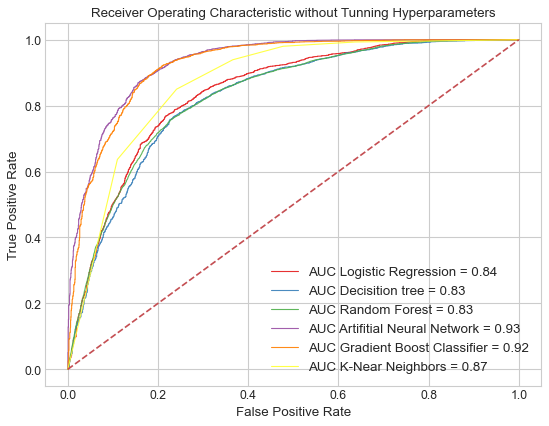

In [175]:
# multiple plot
palette = plt.get_cmap('Set1')#color library

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

for i in range(0,12,2):
    plt.plot(eval('rx'+str(i)), eval('ry'+str(i)), marker='', color=palette(int(i/2)), 
             linewidth=1, alpha=0.9, label='AUC '+classific[int(i/2)]+' = %0.2f' %eval('r'+str(i)))
        
# Add titles
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic '+'without Tunning Hyperparameters',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)

# Add legend
plt.legend(loc = 'lower right', prop={'size': 12})
plt.show()

### ROC w Tunned Hyperparameters GSCV

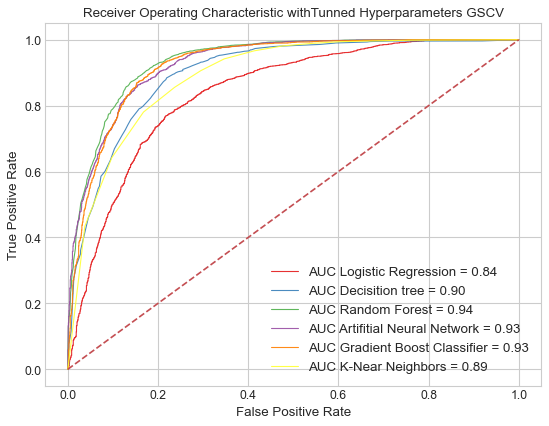

In [176]:
# multiple plot
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

for i in range(0,12,2):
    plt.plot(eval('rx'+str(i+1)), eval('ry'+str(i+1)), marker='', color=palette(int(i/2)), 
             linewidth=1, alpha=0.9, label='AUC '+classific[int(i/2)]+' = %0.2f' %eval('r'+str(i+1)))
        
# Add titles
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic '+'withTunned Hyperparameters GSCV',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)

# Add legend
plt.legend(loc = 'lower right', prop={'size': 12})
plt.show()

### ROC w Tunned Hyperparameters RSCV

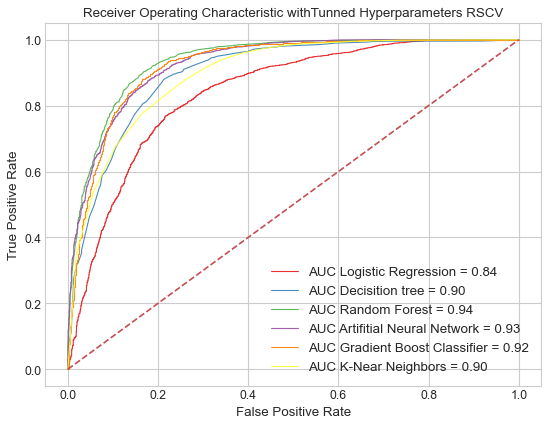

In [177]:
# multiple plot
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

for i in range(0,12,2):
    plt.plot(eval('rx'+str(i+1)+'b'), eval('ry'+str(i+1)+'b'), marker='', color=palette(int(i/2)), 
             linewidth=1, alpha=0.9, label='AUC '+classific[int(i/2)]+' = %0.2f' %eval('r'+str(i+1)+'b'))
        
# Add titles
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic '+'withTunned Hyperparameters RSCV',fontsize=12)
plt.ylabel('True Positive Rate',fontsize=12)
plt.xlabel('False Positive Rate',fontsize=12)

# Add legend
plt.legend(loc = 'lower right', prop={'size': 12})
plt.show()

# Cutting: signal and background 

---



Later, the significance function is again defined. It is defined here to obtain the significance of the data after passing the slicing by minimization function -[2(n signal)-(n background)]

In [178]:
datasets = {}
by_class = df.groupby('class')
#dividing the datased by background and signal
for groups, data in by_class:
    datasets[groups] = data.drop(columns=['class'])
signn=len(datasets['g'])#number of events that are signal
backn=len(datasets['h'])#number of events which are background

In [196]:
def significance(x,i):
    #señal
    j = datasets['g'].iloc[:,i].values
    gg=len([1 for o in j if x[0] < o < x[1] ])#number of signal events between cuts
    if gg==0:
      gg=2.220446049250313e-16# this is the minimum number support by 32 bits. its to avoid 0's in the denominator
    #fondo
    j = datasets['h'].iloc[:,i].values
    hh=len([1 for o in j if x[0] < o < x[1]]) #number of background events between cuts
    return gg/(hh**0.5)

## Signal and background - parameter distributions (without cuts):

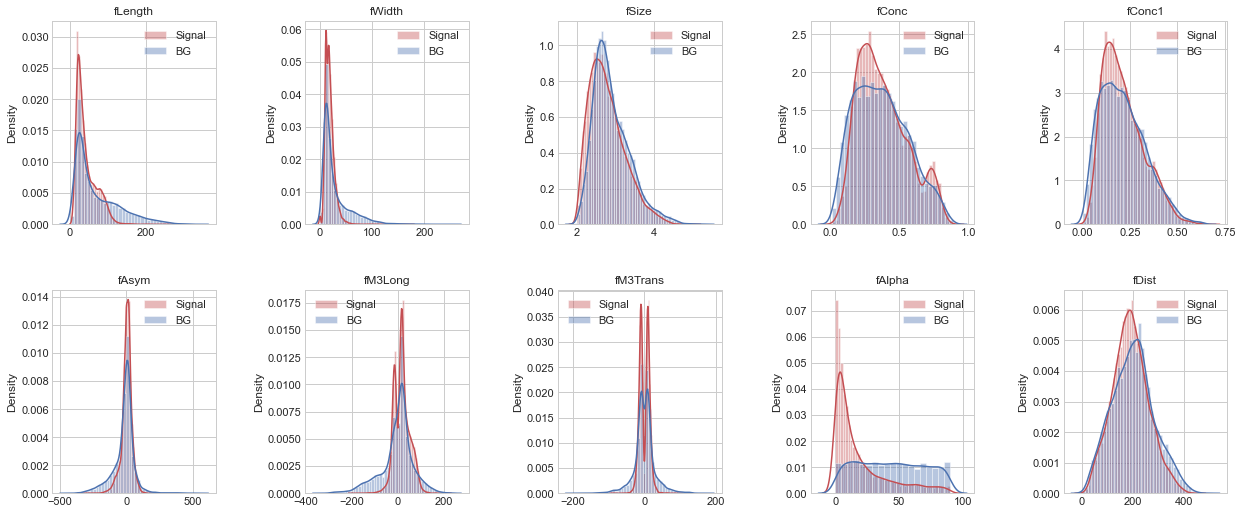

In [197]:
fig, ax = plt.subplots(2,5, figsize=(18, 8))
ax = ax.flatten()
for i in range(10):
    sns.distplot(datasets['g'].iloc[:,i].values, ax=ax[i],color='r', label='Signal',norm_hist=True)
    sns.distplot(datasets['h'].iloc[:,i].values, ax=ax[i],color='b', label='BG',norm_hist=True)
    ax[i].set_title(datasets['g'].columns[i])
    ax[i].legend(loc="best")
fig.tight_layout(pad=2.0)   

## Minimization function: -[2*(#signal)-(#background)]

Obtaining the cuts from the minimization (optimization) of the function -[2*(#signal)-(#background)]

---



In [198]:
#mnimization function
def cut0(x,i):
    j = datasets['g'].iloc[:,i].values#signal data
    gg=len([1 for o in j if x[0] < o < x[1] ])#number of signal events
    j = datasets['h'].iloc[:,i].values#background data
    hh=len([1 for o in j if x[0] < o < x[1]]) #number of background events
    return -1*(gg*2-hh)#minimization function

### CG method of minimization

In [199]:
cortes0=[]#to save the cut values
significan0=[]#to save the significance final value
for i in range(10):
    x0 = np.array([min(datasets['g'].iloc[:,i].values), max(datasets['g'].iloc[:,i].values)])#the initial limits are the extremal values of the signal data
    print(str(df.columns[i]))
    res0 = minimize(cut0, x0,args=(i), method='CG',#'type of solver',
                  options={'disp': True})#'xatol': 1e-8,...,bounds=(min(datasets['g'].iloc[:,i].values), max(datasets['h'].iloc[:,i].values)))
    limits=res0.x#the limits returned by the minimizer are save in this variable
    significan0.append(significance(limits,i))#we evluate the cut values to obtain the significance
    print(limits)
    cortes0.append(limits)
    print()

fLength
Optimization terminated successfully.
         Current function value: -18057.000000
         Iterations: 1
         Function evaluations: 33
         Gradient evaluations: 11
[ 12.1929     272.06305126]

fWidth
Optimization terminated successfully.
         Current function value: -17850.000000
         Iterations: 1
         Function evaluations: 33
         Gradient evaluations: 11
[  0.         176.33505126]

fSize
Optimization terminated successfully.
         Current function value: -17981.000000
         Iterations: 1
         Function evaluations: 33
         Gradient evaluations: 11
[1.9978     5.01005127]

fConc
Optimization terminated successfully.
         Current function value: -17980.000000
         Iterations: 1
         Function evaluations: 33
         Gradient evaluations: 11
[0.0139     0.88895126]

fConc1
Optimization terminated successfully.
         Current function value: -17982.000000
         Iterations: 1
         Function evaluations: 33
         Gra

#### Combination of all cuts

Cutting the dataset:

In [200]:
dfcutall0=df
sizw=[len(dfcutall0)]#para ver como disminuye el tamaño de la data
for i in range(10):
  Xcut=cortes0[i]#asignas lista [corte izq,corte der]
  name=dfcutall0.columns[i]#nombre del parametro
  dfcutall0=dfcutall0[(dfcutall0[name] >Xcut[0]) & (dfcutall0[name] <Xcut[1])].dropna()#aqui se hace el corte
  sizw.append(len(dfcutall0))#guardas el tamaño del dataset tras el corte

Once the data is cutted, lets split the data in signal v background:

In [201]:
datasetcutall = {}
by_class = dfcutall0.groupby('class')

for groups, data in by_class:
    datasetcutall[groups] = data.drop(columns=['class'])

#number of events that are signal:
signcutall0=len(datasetcutall['g'])
# number of events that are background:
backcutall0=len(datasetcutall['h'])

Dividing the data in X and y:

In [202]:
# Create target object and call it y
ycutall0 = dfcutall0['class'].replace('g',1).replace('h',0)

# Create X
features = list(dfcutall0)[:-1]
Xcutall0 = dfcutall0[features]

Plots of distributions

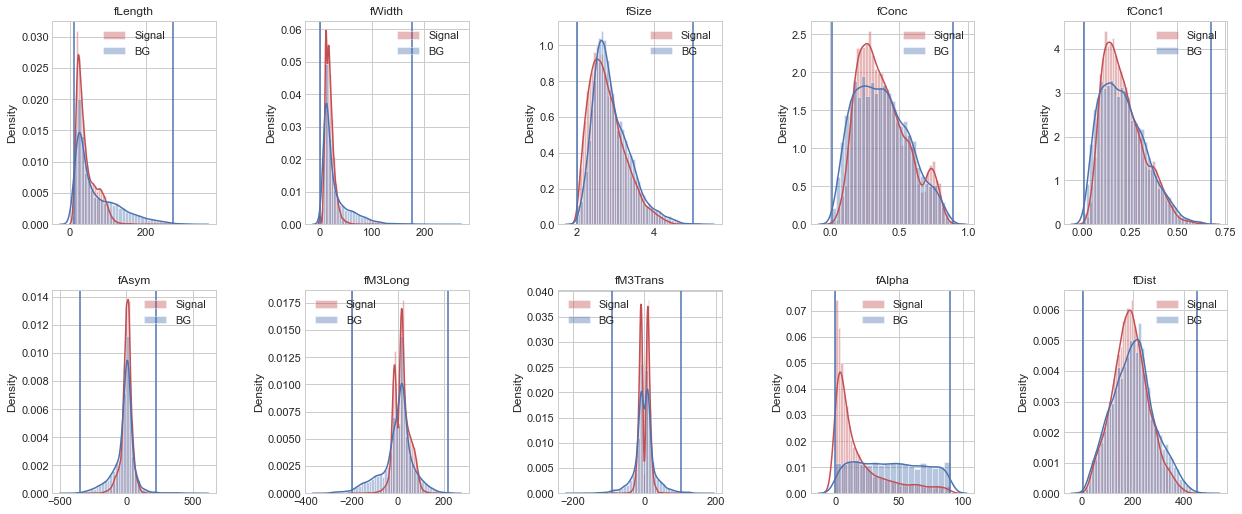

In [203]:
fig, ax = plt.subplots(2,5, figsize=(18, 8))
ax = ax.flatten()
for i in range(10):
    sns.distplot(datasets['g'].iloc[:,i].values, ax=ax[i],color='r', label='Signal')
    sns.distplot(datasets['h'].iloc[:,i].values, ax=ax[i],color='b', label='BG')
    cor=cortes0[i]
    ax[i].axvline( x=cor[0], ymin=0, ymax=1)
    ax[i].axvline( x=cor[1], ymin=0, ymax=1)
    ax[i].set_title(datasets['g'].columns[i])
    ax[i].legend(loc="best")
fig.tight_layout(pad=2.0)   

Cross validation with the best classifier

In [204]:
#random Forest with the best parameters obtained with GSCV
rf_model_c0  = RandomForestClassifier(criterion='entropy',random_state = 0,
                                bootstrap=RFC_params["bootstrap"],
                                max_depth=RFC_params["max_depth"],
                                max_features=RFC_params["max_features"],
                                n_estimators=RFC_params["n_estimators"],
                                );
scores0=[]#to save the cross validations score
porcsignal0=[]#to save the fraction of signal events after the cut in comparison of the initial signal events
porbackground0=[]#to save the fraction of background events after the cut in comparison of the initial background events
portot0=[]#to save the fraction of all events after the cut in comparison of all initial events
#Score of the Random Forest Classifier model :
for i in range(10):#for each parameter of the data
    datasetc0 = {}
    Xcut0=cortes0[i]
    name=df.columns[i]
    dfcut0=df[(df[name] >Xcut0[0]) & (df[name] <Xcut0[1])].dropna()#cutting the data
    #splitting the data between background and signal
    by_classc0 = dfcut0.groupby('class')

    for groups, data in by_classc0:
          datasetc0[groups] = data.drop(columns=['class'])

    #saving the fractions 
    porcsignal0.append(len(datasetc0['g'])/signn)
    porbackground0.append(len(datasetc0['h'])/backn)
    portot0.append(len(dfcut0)/len(df))

    # Create target object and call it y
    ycut0 = dfcut0['class'].replace('g',1).replace('h',0)

    # Create X
    features0 = list(dfcut0)[:-1]
    Xcut0 = dfcut0[features0]
    score0=cross_val_score(rf_model_c0, Xcut0, ycut0, scoring='accuracy')
    scores0.append(score0)
    #print(name+' cut')
    #print(score2)
    #print()

Cross validation

In [205]:
cutall0= cross_val_score(rf_model_c0, Xcutall0, ycutall0, scoring='accuracy')

Summary

In [206]:
cut_0=[]
for i in range(10):
  cut_0.append([df.columns[i],porcsignal0[i],porbackground0[i],portot0[i],scores0[i].mean(),significan0[i],significan0[i]/(signn/backn**0.5)])

cut_0.append(["All",signcutall0/signn,backcutall0/backn,(backcutall0+signcutall0)/len(df),cutall0.mean(),(-1*backcutall0+2*signcutall0),(-1*backcutall0+2*signcutall0)/(2*signn-backn)])
title=["Parameter","Signal","Background","Total","Mean Accuracy RFC w GSCV estimators","Significance","Relative significance"]

print(tabulate(cut_0, headers=title,numalign="right",floatfmt="1.3e",tablefmt="github"))

| Parameter   |    Signal |   Background |     Total |   Mean Accuracy RFC w GSCV estimators |   Significance |   Relative significance |
|-------------|-----------|--------------|-----------|---------------------------------------|----------------|-------------------------|
| fLength     | 9.999e-01 |    9.876e-01 | 9.956e-01 |                             8.807e-01 |      1.517e+02 |               1.006e+00 |
| fWidth      | 9.937e-01 |    9.955e-01 | 9.943e-01 |                             8.823e-01 |      1.502e+02 |               9.959e-01 |
| fSize       | 9.999e-01 |    9.990e-01 | 9.996e-01 |                             8.811e-01 |      1.509e+02 |               1.000e+00 |
| fConc       | 9.999e-01 |    9.991e-01 | 9.996e-01 |                             8.812e-01 |      1.508e+02 |               1.000e+00 |
| fConc1      | 9.999e-01 |    9.988e-01 | 9.995e-01 |                             8.810e-01 |      1.509e+02 |               1.001e+00 |
| fAsym       | 9.999e-01 |    9.9

| Parameter   |    Signal |   Background |     Total |   Mean Accuracy RFC w GSCV estimators |   Significance |   Relative significance |
|-------------|-----------|--------------|-----------|---------------------------------------|----------------|-------------------------|
| fLength     | 9.999e-01 |    9.876e-01 | 9.956e-01 |                             8.807e-01 |      1.517e+02 |               1.006e+00 |
| fWidth      | 9.937e-01 |    9.955e-01 | 9.943e-01 |                             8.823e-01 |      1.502e+02 |               9.959e-01 |
| fSize       | 9.999e-01 |    9.990e-01 | 9.996e-01 |                             8.811e-01 |      1.509e+02 |               1.000e+00 |
| fConc       | 9.999e-01 |    9.991e-01 | 9.996e-01 |                             8.812e-01 |      1.508e+02 |               1.000e+00 |
| fConc1      | 9.999e-01 |    9.988e-01 | 9.995e-01 |                             8.810e-01 |      1.509e+02 |               1.001e+00 |
| fAsym       | 9.999e-01 |    9.919e-01 | 9.971e-01 |                             8.818e-01 |      1.514e+02 |               1.004e+00 |
| fM3Long     | 9.999e-01 |    9.855e-01 | 9.948e-01 |                             8.807e-01 |      1.519e+02 |               1.007e+00 |
| fM3Trans    | 9.999e-01 |    9.833e-01 | 9.941e-01 |                             8.811e-01 |      1.521e+02 |               1.008e+00 |
| fAlpha      | 9.996e-01 |    1.000e+00 | 9.997e-01 |                             8.824e-01 |      1.507e+02 |               9.996e-01 |
| fDist       | 9.999e-01 |    9.990e-01 | 9.996e-01 |                             8.805e-01 |      1.509e+02 |               1.000e+00 |
| All         | 9.929e-01 |    9.499e-01 | 9.778e-01 |                             8.799e-01 |      1.814e+04 |               1.009e+00 |

The significance is measured with the function (# signal)/(#background^0.5). This election of function and method is the worst. 



---



---



### Nelder-mead method

In [207]:
cortes1=[]#para guardar los cortes
significan1=[]
for i in range(10):
  x0 = np.array([min(datasets['g'].iloc[:,i].values), max(datasets['g'].iloc[:,i].values)]) #valores iniciales: extremos
  print(str(df.columns[i]))
  res1 = minimize(cut0, x0,args=(i), method='nelder-mead',
                 options={'xatol': 1e-8, 'disp': True})#,bounds=(min(datasets['g'].iloc[:,i].values), max(datasets['g'].iloc[:,i].values)))
  limits=res1.x
  significan1.append(significance(limits,i))
  print(limits)
  cortes1.append(limits)
  print()

fLength
Optimization terminated successfully.
         Current function value: -19214.000000
         Iterations: 61
         Function evaluations: 162
[ 12.28535477 114.72620385]

fWidth
Optimization terminated successfully.
         Current function value: -17986.000000
         Iterations: 38
         Function evaluations: 133
[-1.17187500e-04  1.77023809e+02]

fSize
Optimization terminated successfully.
         Current function value: -17981.000000
         Iterations: 28
         Function evaluations: 103
[1.96034125 5.02565625]

fConc
Optimization terminated successfully.
         Current function value: -17994.000000
         Iterations: 29
         Function evaluations: 91
[0.01385656 0.85001062]

fConc1
Optimization terminated successfully.
         Current function value: -17987.000000
         Iterations: 29
         Function evaluations: 101
[0.00860031 0.71529   ]

fAsym
Optimization terminated successfully.
         Current function value: -18096.000000
         Iteratio

#### Combination of all cuts

Cutting the dataset:

In [208]:
dfcutall1=df
sizw1=[len(dfcutall1)]#para ver como disminuye el tamaño de la data
for i in range(10):
  Xcut=cortes1[i]#asignas lista [corte izq,corte der]
  name=dfcutall1.columns[i]#nombre del parametro
  dfcutall1=dfcutall1[(dfcutall1[name] >Xcut[0]) & (dfcutall1[name] <Xcut[1])].dropna()#aqui se hace el corte
  sizw1.append(len(dfcutall1))#guardas el tamaño del dataset tras el corte

Once the data is cutted, lets split the data in signal v background:

In [209]:
datasetcutall1 = {}
by_class = dfcutall1.groupby('class')

for groups, data in by_class:
    datasetcutall1[groups] = data.drop(columns=['class'])

#number of events that are signal:
signcutall1=len(datasetcutall1['g'])
# number of events that are background:
backcutall1=len(datasetcutall1['h'])

Dividing the data in X and y:

In [210]:
# Create target object and call it y
ycutall1 = dfcutall1['class'].replace('g',1).replace('h',0)

# Create X
features = list(dfcutall1)[:-1]
Xcutall1 = dfcutall1[features]

Plots of distributions

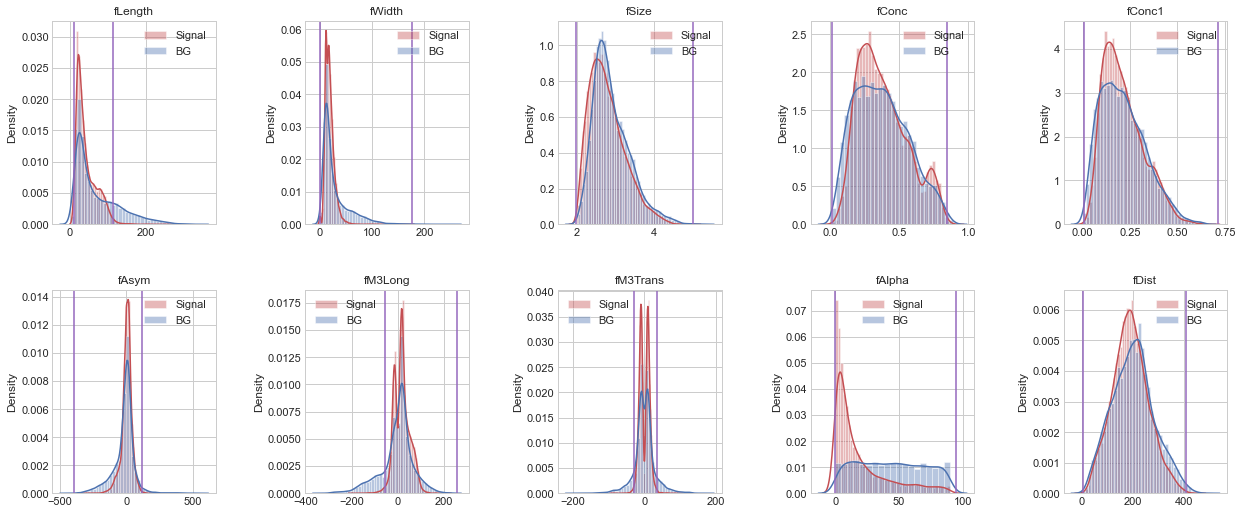

In [211]:
fig, ax = plt.subplots(2,5, figsize=(18, 8))
ax = ax.flatten()
for i in range(10):
    sns.distplot(datasets['g'].iloc[:,i].values, ax=ax[i],color='r', label='Signal')
    sns.distplot(datasets['h'].iloc[:,i].values, ax=ax[i],color='b', label='BG')
    cor=cortes1[i]
    ax[i].axvline( x=cor[0], ymin=0, ymax=1,c='tab:purple')
    ax[i].axvline( x=cor[1], ymin=0, ymax=1,c='tab:purple')
    ax[i].set_title(datasets['g'].columns[i])
    ax[i].legend(loc="best")
fig.tight_layout(pad=2.0)   

In [212]:
rf_model_c1  = RandomForestClassifier(criterion='entropy',random_state = 0,
                                bootstrap=RFC_params["bootstrap"],
                                max_depth=RFC_params["max_depth"],
                                max_features=RFC_params["max_features"],
                                n_estimators=RFC_params["n_estimators"],
                                );
scores1=[]
porcsignal1=[]
porbackground1=[]
portot1=[]
#Score of the Random Forest Classifier model :
for i in range(10):
    datasetc1 = {}
    Xcut1=cortes1[i]
    name=df.columns[i]
    dfcut1=df[(df[name] >Xcut1[0]) & (df[name] <Xcut1[1])].dropna()
    by_classc = dfcut1.groupby('class')

    for groups, data in by_classc:
          datasetc1[groups] = data.drop(columns=['class'])
    porcsignal1.append(len(datasetc1['g'])/signn)
    porbackground1.append(len(datasetc1['h'])/backn)
    portot1.append(len(dfcut1)/len(df))

    # Create target object and call it y
    ycut1 = dfcut1['class'].replace('g',1).replace('h',0)

    # Create X
    features1 = list(dfcut1)[:-1]
    Xcut1 = dfcut1[features1]
    score=cross_val_score(rf_model_c1, Xcut1, ycut1, scoring='accuracy')
    scores1.append(score)
    #print(name+' cut')
    #print(score)
    #print()

In [213]:
cutall1= cross_val_score(rf_model_c1, Xcutall1, ycutall1, scoring='accuracy')

In [214]:
cut_1=[]
for i in range(10):
  cut_1.append([df.columns[i],porcsignal1[i],porbackground1[i],portot1[i],scores1[i].mean(),significan1[i],significan1[i]/(signn/backn**0.5)])

cut_1.append(["All",signcutall1/signn,backcutall1/backn,(backcutall1+signcutall1)/len(df),cutall1.mean(),(-1*backcutall1+2*signcutall1),(-1*backcutall1+2*signcutall1)/(2*signn-backn)])

print(tabulate(cut_1, headers=title,numalign="right",floatfmt="1.3e",tablefmt="github"))

| Parameter   |    Signal |   Background |     Total |   Mean Accuracy RFC w GSCV estimators |   Significance |   Relative significance |
|-------------|-----------|--------------|-----------|---------------------------------------|----------------|-------------------------|
| fLength     | 9.895e-01 |    7.760e-01 | 9.144e-01 |                             8.755e-01 |      1.694e+02 |               1.123e+00 |
| fWidth      | 1.000e+00 |    9.985e-01 | 9.995e-01 |                             8.817e-01 |      1.509e+02 |               1.001e+00 |
| fSize       | 1.000e+00 |    9.993e-01 | 9.997e-01 |                             8.805e-01 |      1.509e+02 |               1.000e+00 |
| fConc       | 9.996e-01 |    9.958e-01 | 9.983e-01 |                             8.818e-01 |      1.510e+02 |               1.002e+00 |
| fConc1      | 9.999e-01 |    9.981e-01 | 9.993e-01 |                             8.816e-01 |      1.509e+02 |               1.001e+00 |
| fAsym       | 9.981e-01 |    9.7

| Parameter   |    Signal |   Background |     Total |   Mean Accuracy RFC w GSCV estimators |   Significance |   Relative significance |
|-------------|-----------|--------------|-----------|---------------------------------------|----------------|-------------------------|
| fLength     | 9.895e-01 |    7.760e-01 | 9.144e-01 |                             8.755e-01 |      1.694e+02 |               1.123e+00 |
| fWidth      | 1.000e+00 |    9.985e-01 | 9.995e-01 |                             8.817e-01 |      1.509e+02 |               1.001e+00 |
| fSize       | 1.000e+00 |    9.993e-01 | 9.997e-01 |                             8.805e-01 |      1.509e+02 |               1.000e+00 |
| fConc       | 9.996e-01 |    9.958e-01 | 9.983e-01 |                             8.818e-01 |      1.510e+02 |               1.002e+00 |
| fConc1      | 9.999e-01 |    9.981e-01 | 9.993e-01 |                             8.816e-01 |      1.509e+02 |               1.001e+00 |
| fAsym       | 9.981e-01 |    9.752e-01 | 9.901e-01 |                             8.814e-01 |      1.524e+02 |               1.011e+00 |
| fM3Long     | 9.886e-01 |    8.225e-01 | 9.302e-01 |                             8.772e-01 |      1.644e+02 |               1.090e+00 |
| fM3Trans    | 9.849e-01 |    8.032e-01 | 9.210e-01 |                             8.774e-01 |      1.657e+02 |               1.099e+00 |
| fAlpha      | 1.000e+00 |    1.000e+00 | 1.000e+00 |                             8.811e-01 |      1.508e+02 |               1.000e+00 |
| fDist       | 9.993e-01 |    9.925e-01 | 9.969e-01 |                             8.798e-01 |      1.513e+02 |               1.003e+00 |
| All         | 9.662e-01 |    6.743e-01 | 8.636e-01 |                             8.746e-01 |      1.932e+04 |               1.075e+00 |

## Minimization function: Significance

Obteniendo los cortes a partir de reducción (optimización) de la función [(#signal)/(#background)^0.5]^-1

---



In [215]:
def cut2(x,i):
    #señal
    j = datasets['g'].iloc[:,i].values
    gg=len([1 for o in j if x[0] < o < x[1] ])
    if gg==0:
      gg=2.220446049250313e-16
    #fondo
    j = datasets['h'].iloc[:,i].values
    hh=len([1 for o in j if x[0] < o < x[1]]) 
    return (hh**0.5)/gg

### CG method

In [216]:
cortes2=[]
significan2=[]
for i in range(10):
  x0 = np.array([min(datasets['g'].iloc[:,i].values), max(datasets['g'].iloc[:,i].values)])
  print(str(df.columns[i]))
  res2 = minimize(cut2, x0,args=(i), method='CG',#'nelder-mead',
                  options={ 'disp': True})#'xatol': 1e-8,...,bounds=(min(datasets['g'].iloc[:,i].values), max(datasets['h'].iloc[:,i].values)))
  limits=res2.x
  significan2.append(cut2(limits,i))
  print(limits)
  cortes2.append(limits)
  print()

fLength
Optimization terminated successfully.
         Current function value: 0.006591
         Iterations: 1
         Function evaluations: 33
         Gradient evaluations: 11
[ 12.1929     272.06305126]

fWidth
Optimization terminated successfully.
         Current function value: 0.006659
         Iterations: 1
         Function evaluations: 33
         Gradient evaluations: 11
[  0.         176.33505126]

fSize
Optimization terminated successfully.
         Current function value: 0.006629
         Iterations: 1
         Function evaluations: 33
         Gradient evaluations: 11
[1.9978     5.01005127]

fConc
Optimization terminated successfully.
         Current function value: 0.006629
         Iterations: 1
         Function evaluations: 33
         Gradient evaluations: 11
[0.0139    0.8889513]

fConc1
Optimization terminated successfully.
         Current function value: 0.006628
         Iterations: 1
         Function evaluations: 33
         Gradient evaluations: 11
[0.00

#### Combination of all cuts

Cutting the dataset:

In [217]:
dfcutall2=df
sizw=[len(dfcutall2)]
for i in range(10):
  Xcut=cortes2[i]
  name=dfcutall2.columns[i]
  dfcutall2=dfcutall2[(dfcutall2[name] >Xcut[0]) & (dfcutall2[name] <Xcut[1])].dropna()
  sizw.append(len(dfcutall2))
#sizw

Once the data is cutted, lets split the data in signal v background:

In [218]:
datasetcutall2 = {}
by_class = dfcutall2.groupby('class')

for groups, data in by_class:
    datasetcutall2[groups] = data.drop(columns=['class'])

#number of events that are signal:
signcutall2=len(datasetcutall2['g'])
# number of events that are background:
backcutall2=len(datasetcutall2['h'])

Dividing the data in X and y:

In [219]:
# Create target object and call it y
ycutall2 = dfcutall2['class'].replace('g',1).replace('h',0)

# Create X
features = list(dfcutall2)[:-1]
Xcutall2 = dfcutall2[features]

Plots of distributions

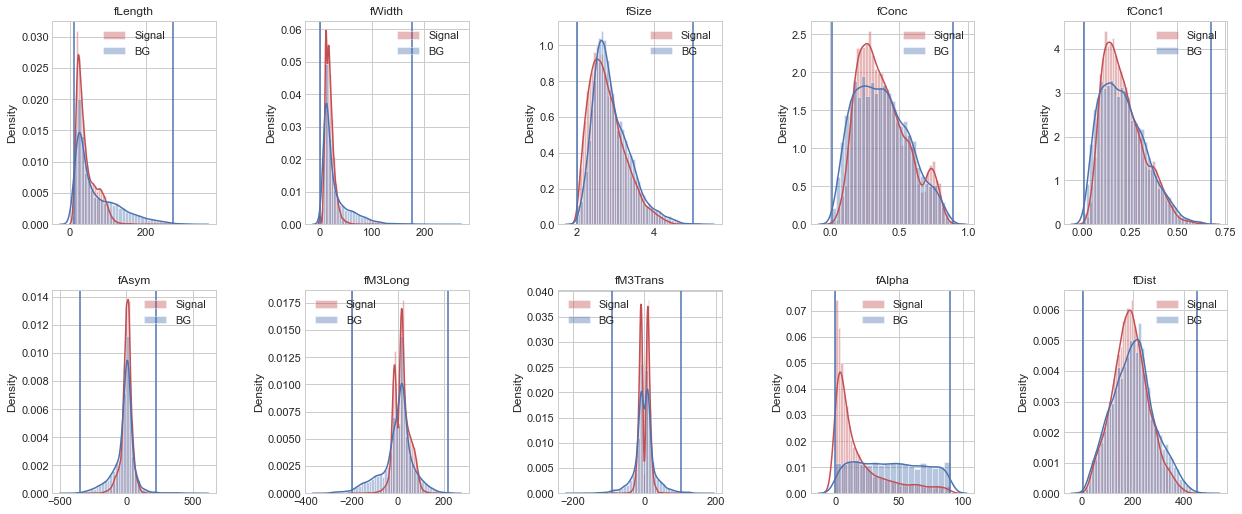

In [220]:
fig, ax = plt.subplots(2,5, figsize=(18, 8))
ax = ax.flatten()
for i in range(10):
    sns.distplot(datasets['g'].iloc[:,i].values, ax=ax[i],color='r', label='Signal')
    sns.distplot(datasets['h'].iloc[:,i].values, ax=ax[i],color='b', label='BG')
    cor2=cortes2[i]
    ax[i].axvline( x=cor2[0], ymin=0, ymax=1)
    ax[i].axvline( x=cor2[1], ymin=0, ymax=1)
    ax[i].set_title(datasets['g'].columns[i])
    ax[i].legend(loc="best")
fig.tight_layout(pad=2.0)   

In [221]:
rf_model_c2  = RandomForestClassifier(criterion = 'entropy', random_state = 0)
scores2=[]
porcsignal2=[]
porbackground2=[]
portot2=[]
#Score of the Random Forest Classifier model :
for i in range(10):
    datasetc2 = {}
    Xcut2=cortes2[i]
    name=df.columns[i]
    dfcut2=df[(df[name] >Xcut2[0]) & (df[name] <Xcut2[1])].dropna()
    by_classc2 = dfcut2.groupby('class')

    for groups, data in by_classc2:
          datasetc2[groups] = data.drop(columns=['class'])

    porcsignal2.append(len(datasetc2['g'])/signn)
    porbackground2.append(len(datasetc2['h'])/backn)
    portot2.append(len(dfcut2)/len(df))

    # Create target object and call it y
    ycut2 = dfcut2['class'].replace('g',1).replace('h',0)

    # Create X
    features2 = list(dfcut2)[:-1]
    Xcut2 = dfcut2[features2]
    score2=cross_val_score(rf_model_c2, Xcut2, ycut2, scoring='accuracy')
    scores2.append(score2)
#    print(name+' cut')
#    print(score2)
#    print()

In [222]:
cutall2= cross_val_score(rf_model_c2, Xcutall2, ycutall2, scoring='accuracy')

In [223]:
cut_2=[]
for i in range(10):
  cut_2.append([df.columns[i],porcsignal2[i],porbackground2[i],portot2[i],scores2[i].mean(),significan2[i]**-1,(significan2[i]**-1)/(signn/backn**0.5)])

cut_2.append(["All",signcutall2/signn,backcutall2/backn,(backcutall2+signcutall2)/len(df),cutall2.mean(),(signcutall2/backcutall2**0.5),(signcutall2/backcutall2**0.5)/(signn/backn**0.5)])

print(tabulate(cut_2, headers=title,numalign="right",floatfmt="1.3e",tablefmt="github"))

| Parameter   |    Signal |   Background |     Total |   Mean Accuracy RFC w GSCV estimators |   Significance |   Relative significance |
|-------------|-----------|--------------|-----------|---------------------------------------|----------------|-------------------------|
| fLength     | 9.999e-01 |    9.876e-01 | 9.956e-01 |                             8.796e-01 |      1.517e+02 |               1.006e+00 |
| fWidth      | 9.937e-01 |    9.955e-01 | 9.943e-01 |                             8.820e-01 |      1.502e+02 |               9.959e-01 |
| fSize       | 9.999e-01 |    9.990e-01 | 9.996e-01 |                             8.809e-01 |      1.509e+02 |               1.000e+00 |
| fConc       | 9.999e-01 |    9.991e-01 | 9.996e-01 |                             8.805e-01 |      1.508e+02 |               1.000e+00 |
| fConc1      | 9.999e-01 |    9.988e-01 | 9.995e-01 |                             8.803e-01 |      1.509e+02 |               1.001e+00 |
| fAsym       | 9.999e-01 |    9.9

| Parameter   |    Signal |   Background |     Total |   Mean Accuracy RFC w GSCV estimators |   Significance |   Relative significance |
|-------------|-----------|--------------|-----------|---------------------------------------|----------------|-------------------------|
| fLength     | 9.999e-01 |    9.876e-01 | 9.956e-01 |                             8.796e-01 |      1.517e+02 |               1.006e+00 |
| fWidth      | 9.937e-01 |    9.955e-01 | 9.943e-01 |                             8.820e-01 |      1.502e+02 |               9.959e-01 |
| fSize       | 9.999e-01 |    9.990e-01 | 9.996e-01 |                             8.809e-01 |      1.509e+02 |               1.000e+00 |
| fConc       | 9.999e-01 |    9.991e-01 | 9.996e-01 |                             8.805e-01 |      1.508e+02 |               1.000e+00 |
| fConc1      | 9.999e-01 |    9.988e-01 | 9.995e-01 |                             8.803e-01 |      1.509e+02 |               1.001e+00 |
| fAsym       | 9.999e-01 |    9.919e-01 | 9.971e-01 |                             8.810e-01 |      1.514e+02 |               1.004e+00 |
| fM3Long     | 9.999e-01 |    9.855e-01 | 9.948e-01 |                             8.798e-01 |      1.519e+02 |               1.007e+00 |
| fM3Trans    | 9.999e-01 |    9.833e-01 | 9.941e-01 |                             8.795e-01 |      1.521e+02 |               1.008e+00 |
| fAlpha      | 9.996e-01 |    1.000e+00 | 9.997e-01 |                             8.805e-01 |      1.507e+02 |               9.996e-01 |
| fDist       | 9.999e-01 |    9.990e-01 | 9.996e-01 |                             8.811e-01 |      1.509e+02 |               1.000e+00 |
| All         | 9.929e-01 |    9.499e-01 | 9.778e-01 |                             8.800e-01 |      1.536e+02 |               1.019e+00 |



---



---



### Nelder-mead method

In [224]:
cortes3=[]
signifan3=[]
for i in range(10):
  x0 = np.array([min(datasets['g'].iloc[:,i].values), max(datasets['g'].iloc[:,i].values)])
  print(str(df.columns[i]))
  res3 = minimize(cut2, x0,args=(i), method='nelder-mead',
                  options={ 'xatol': 1e-8,'disp': True})#'xatol': 1e-8,...,bounds=(min(datasets['g'].iloc[:,i].values), max(datasets['h'].iloc[:,i].values)))
  limits3=res3.x
  signifan3.append(cut2(limits3,i))
  print(limits3)
  cortes3.append(limits3)
  print()
cortes3=np.array(cortes3)

fLength
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 45
         Function evaluations: 154
[12.55487672  5.31373047]

fWidth
Optimization terminated successfully.
         Current function value: 0.005960
         Iterations: 50
         Function evaluations: 144
[-1.13352966e-03  3.96769894e+01]

fSize
Optimization terminated successfully.
         Current function value: 0.006609
         Iterations: 44
         Function evaluations: 123
[1.99350814 4.31813057]

fConc
Optimization terminated successfully.
         Current function value: 0.006621
         Iterations: 30
         Function evaluations: 93
[0.01443754 0.83126039]

fConc1
Optimization terminated successfully.
         Current function value: 0.006527
         Iterations: 48
         Function evaluations: 129
[0.06326423 0.96240727]

fAsym
Optimization terminated successfully.
         Current function value: 0.006559
         Iterations: 45
         Function evaluat

#### Combination of all cuts

In [225]:
dfcutall3=df
sizw=[len(dfcutall3)]
for i in range(1,10):
  Xcut3=cortes3[i]
  name=dfcutall3.columns[i]
  dfcutall3=dfcutall3[(dfcutall3[name] >Xcut3[0]) & (dfcutall3[name] <Xcut3[1])].dropna()
  sizw.append(len(dfcutall3))
#sizw

In [226]:
datasetcutall3 = {}
by_class = dfcutall3.groupby('class')

for groups, data in by_class:
    datasetcutall3[groups] = data.drop(columns=['class'])
    
signcutall3=len(datasetcutall3['g'])
backcutall3=len(datasetcutall3['h'])
significancetotal3=signcutall3/backcutall3**0.5

In [227]:
# Create target object and call it y
ycutall3 = dfcutall3['class'].replace('g',1).replace('h',0)

# Create X
features = list(dfcutall3)[:-1]
Xcutall3 = dfcutall3[features]

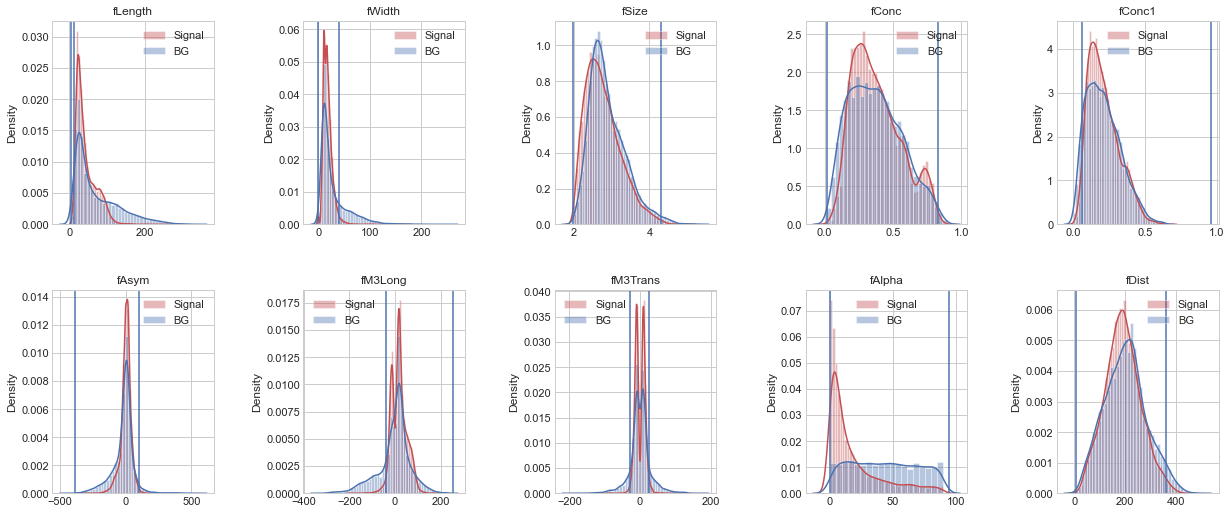

In [228]:
fig, ax = plt.subplots(2,5, figsize=(18, 8))
ax = ax.flatten()
for i in range(10):
    sns.distplot(datasets['g'].iloc[:,i].values, ax=ax[i],color='r', label='Signal')
    sns.distplot(datasets['h'].iloc[:,i].values, ax=ax[i],color='b', label='BG')
    cor3=cortes3[i]
    ax[i].axvline( x=cor3[0], ymin=0, ymax=1)
    ax[i].axvline( x=cor3[1], ymin=0, ymax=1)
    ax[i].set_title(datasets['g'].columns[i])
    ax[i].legend(loc="best")
fig.tight_layout(pad=2.0)   

In [229]:
rf_model_c3  = RandomForestClassifier(criterion = 'entropy', random_state = 0)
scores3=[]
porcsignal3=[]
porbackground3=[]
portot3=[]
#Score of the Random Forest Classifier model :
for i in range(1,10):
    datasetc3 = {}
    Xcut3=cortes3[i]
    name=df.columns[i]
    dfcut3=df[(df[name] >Xcut3[0]) & (df[name] <Xcut3[1])].dropna()
    by_classc3 = dfcut3.groupby('class')

    for groups, data in by_classc3:
          datasetc3[groups] = data.drop(columns=['class'])

    porcsignal3.append(len(datasetc3['g'])/signn)
    porbackground3.append(len(datasetc3['h'])/backn)
    portot3.append(len(dfcut3)/len(df))

    # Create target object and call it y
    ycut3 = dfcut3['class'].replace('g',1).replace('h',0)

    # Create X
    features3 = list(dfcut3)[:-1]
    Xcut3 = dfcut3[features3]
    score3=cross_val_score(rf_model_c3, Xcut3, ycut3, scoring='accuracy')
    scores3.append(score3)
    #print(name+' cut')
    #print(score3)
    #print()

In [230]:
cutall3= cross_val_score(rf_model_c3, Xcutall3, ycutall3, scoring='accuracy')

In [231]:
cut_3=[]
for i in range(1,10):
  cut_3.append([df.columns[i],porcsignal3[i-1],porbackground3[i-1],portot3[i-1],scores3[i-1].mean(),signifan3[i]**-1,(signifan3[i]**-1)/(signn/backn**0.5)])

cut_3.append(["All",signcutall3/signn,backcutall3/backn,(backcutall3+signcutall3)/len(df),cutall3.mean(),significancetotal3,significancetotal3/(signn/backn**0.5)])

print(tabulate(cut_3, headers=title,numalign="right",floatfmt="1.3e",tablefmt="github"))

| Parameter   |    Signal |   Background |     Total |   Mean Accuracy RFC w GSCV estimators |   Significance |   Relative significance |
|-------------|-----------|--------------|-----------|---------------------------------------|----------------|-------------------------|
| fWidth      | 9.766e-01 |    7.703e-01 | 9.040e-01 |                             8.742e-01 |      1.678e+02 |               1.113e+00 |
| fSize       | 9.972e-01 |    9.874e-01 | 9.937e-01 |                             8.802e-01 |      1.513e+02 |               1.003e+00 |
| fConc       | 9.981e-01 |    9.930e-01 | 9.963e-01 |                             8.807e-01 |      1.510e+02 |               1.002e+00 |
| fConc1      | 9.755e-01 |    9.218e-01 | 9.566e-01 |                             8.771e-01 |      1.532e+02 |               1.016e+00 |
| fAsym       | 9.959e-01 |    9.704e-01 | 9.870e-01 |                             8.812e-01 |      1.525e+02 |               1.011e+00 |
| fM3Long     | 9.720e-01 |    7.8

| Parameter   |    Signal |   Background |     Total |   Mean Accuracy RFC w GSCV estimators |   Significance |   Relative significance |
|-------------|-----------|--------------|-----------|---------------------------------------|----------------|-------------------------|
| fWidth      | 9.766e-01 |    7.703e-01 | 9.040e-01 |                             8.742e-01 |      1.678e+02 |               1.113e+00 |
| fSize       | 9.972e-01 |    9.874e-01 | 9.937e-01 |                             8.802e-01 |      1.513e+02 |               1.003e+00 |
| fConc       | 9.981e-01 |    9.930e-01 | 9.963e-01 |                             8.807e-01 |      1.510e+02 |               1.002e+00 |
| fConc1      | 9.755e-01 |    9.218e-01 | 9.566e-01 |                             8.771e-01 |      1.532e+02 |               1.016e+00 |
| fAsym       | 9.959e-01 |    9.704e-01 | 9.870e-01 |                             8.812e-01 |      1.525e+02 |               1.011e+00 |
| fM3Long     | 9.720e-01 |    7.817e-01 | 9.051e-01 |                             8.759e-01 |      1.658e+02 |               1.099e+00 |
| fM3Trans    | 9.721e-01 |    7.727e-01 | 9.020e-01 |                             8.756e-01 |      1.668e+02 |               1.106e+00 |
| fAlpha      | 1.000e+00 |    1.000e+00 | 1.000e+00 |                             8.809e-01 |      1.508e+02 |               1.000e+00 |
| fDist       | 9.891e-01 |    9.656e-01 | 9.808e-01 |                             8.793e-01 |      1.518e+02 |               1.007e+00 |
| All         | 9.202e-01 |    6.471e-01 | 8.242e-01 |                             8.747e-01 |      1.725e+02 |               1.144e+00 |

# Removing highly correlated parameters

Deleting the parameter 'fConc1' because it is verry correlated (p=0.98) with 'fConc1' and it can be redundant

In [232]:
dfwofconc1 = df
del dfwofconc1['fConc1']
dfwofconc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fAsym     19020 non-null  float64
 5   fM3Long   19020 non-null  float64
 6   fM3Trans  19020 non-null  float64
 7   fAlpha    19020 non-null  float64
 8   fDist     19020 non-null  float64
 9   class     19020 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


Splitting X and y

In [233]:
# Create target object and call it y
ywc = dfwofconc1['class'].replace('g',1).replace('h',0)

# Create X
features = list(dfwofconc1)[:-1]
Xwc = dfwofconc1[features]

Using a Random Forest Classifier with defined parameters gscv

In [234]:
# Define the model. Set random_state to 0
rf_model_wc  =RandomForestClassifier(criterion='entropy',random_state = 0,
                                bootstrap=RFC_params["bootstrap"],
                                max_depth=RFC_params["max_depth"],
                                max_features=RFC_params["max_features"],
                                n_estimators=RFC_params["n_estimators"],
                                );

Cross Validation

In [235]:
scorewc  =cross_val_score(rf_model_wc, Xwc, ywc, cv=5, scoring='accuracy')# in 5 groups
print('Mean Accuracy Score RFC w parameters: %2f' %(scorewc.mean()))

Mean Accuracy Score RFC w parameters: 0.881861


Spliting data in test and validation:

In [236]:
# Split into validation and training data
train_X_wc, val_X_wc, train_y_wc, val_y_wc = train_test_split(Xwc, ywc, test_size = 0.25, random_state = 0)

Score

In [237]:
# fit your model
rf_model_wc.fit(train_X_wc, train_y_wc)

print_score(rf_model_wc,train_X_wc, train_y_wc, val_X_wc, val_y_wc, train=False)


Test Result:
accuracy score: 0.8841219768664563

Classification Report: 
 	Precision: 0.8816425120772947
	Recall Score: 0.9483598570964599
	F1 score: 0.9137850101705524

Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |          1284 |           392 |
| True T   |           159 |          2920 |
+----------+---------------+---------------+

Relative Confusion Matrix: 

+----------+---------------+---------------+
|          |   Predicted F |   Predicted T |
|----------+---------------+---------------|
| True F   |        0.766  |         0.234 |
| True T   |        0.0516 |         0.948 |
+----------+---------------+---------------+




---



---



---

